In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(100,)))  # Input is a 100-dimension noise vector
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(784, activation='tanh'))  # Output image size (28x28 flattened)

    return model


In [ ]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(784,)))  # Input is a 28x28 image (flattened)
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output is a probability

    return model


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)


In [ ]:
class GAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, generator_optimizer, discriminator_optimizer, loss_fn):
        super(GAN, self).compile()
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal([batch_size, 100])

        # Train the discriminator
        with tf.GradientTape() as tape:
            generated_images = self.generator(noise)
            real_output = self.discriminator(real_images)
            fake_output = self.discriminator(generated_images)

            real_loss = self.loss_fn(tf.ones_like(real_output), real_output)
            fake_loss = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            discriminator_loss = real_loss + fake_loss

        grads = tape.gradient(discriminator_loss, self.discriminator.trainable_weights)
        self.discriminator_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Train the generator
        with tf.GradientTape() as tape:
            generated_images = self.generator(noise)
            fake_output = self.discriminator(generated_images)
            generator_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)

        grads = tape.gradient(generator_loss, self.generator.trainable_weights)
        self.generator_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        return {"discriminator_loss": discriminator_loss, "generator_loss": generator_loss}


In [ ]:
def train_gan(gan, dataset, epochs, noise_dim):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        for real_images in dataset:
            gan.train_step(real_images)

        # Generate and display images after every epoch
        noise = tf.random.normal([16, noise_dim])
        generated_images = gan.generator(noise)
        plot_generated_images(epoch, generated_images)

def plot_generated_images(epoch, images, examples=16, dim=(4, 4), figsize=(5, 5)):
    images = images.numpy().reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28 * 28).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

batch_size = 256
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150


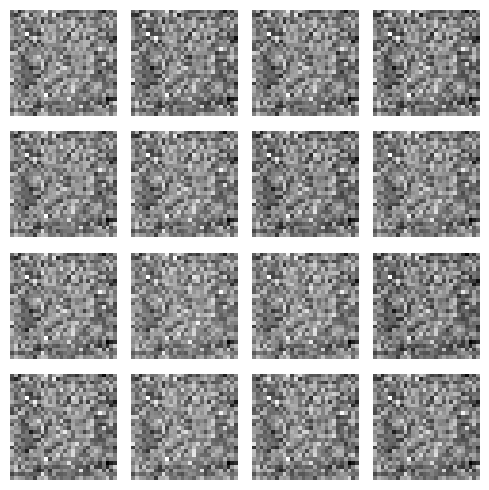

Epoch 2/150


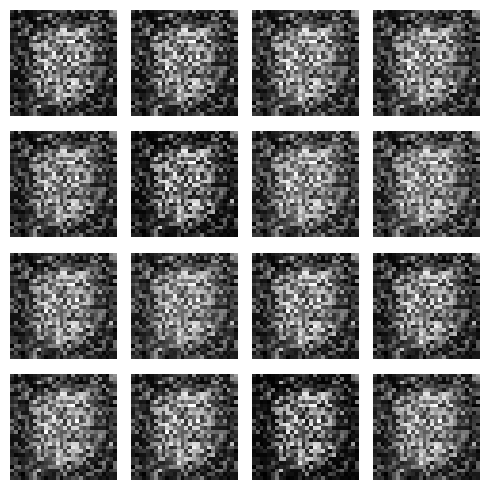

Epoch 3/150


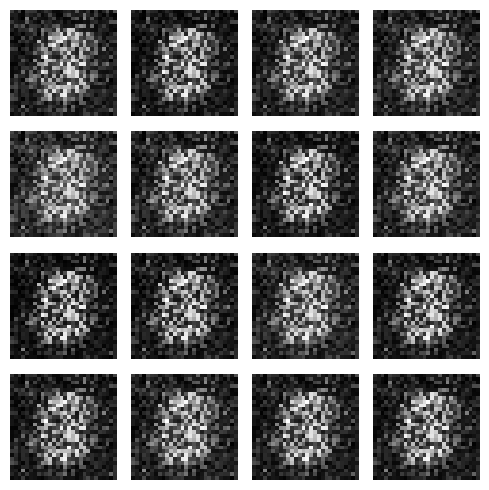

Epoch 4/150


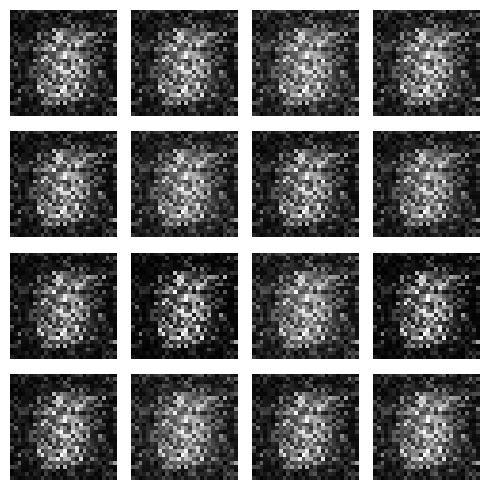

Epoch 5/150


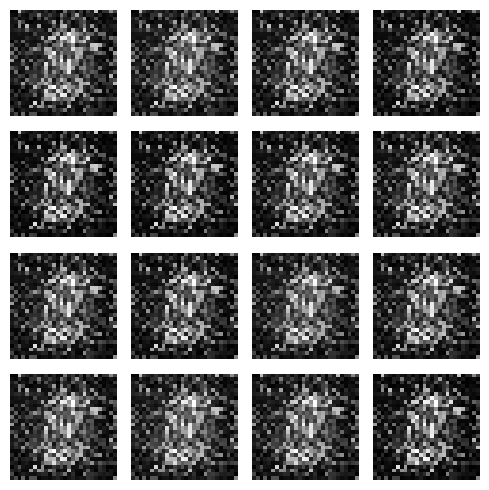

Epoch 6/150


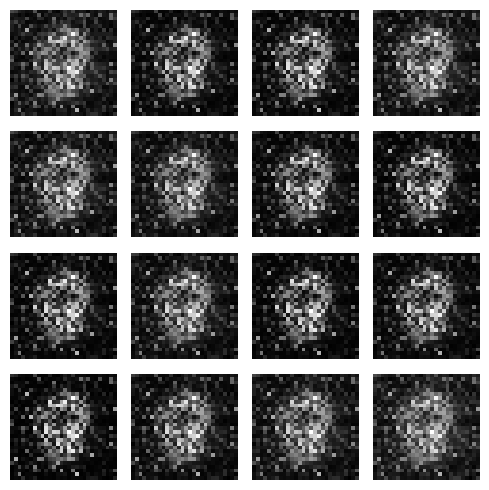

Epoch 7/150


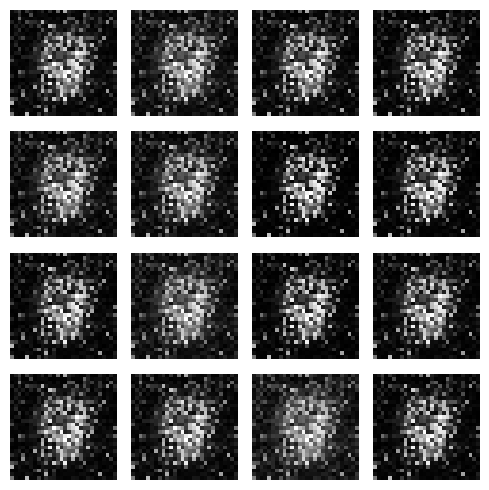

Epoch 8/150


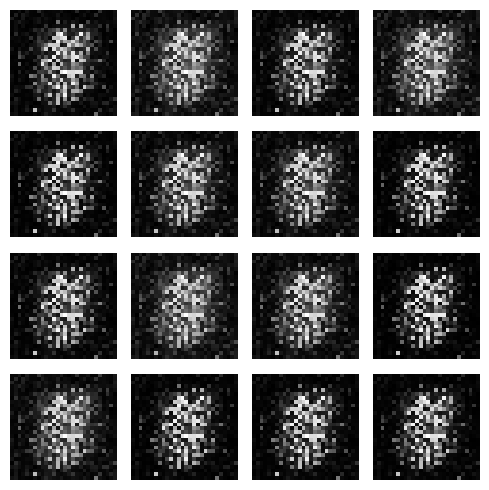

Epoch 9/150


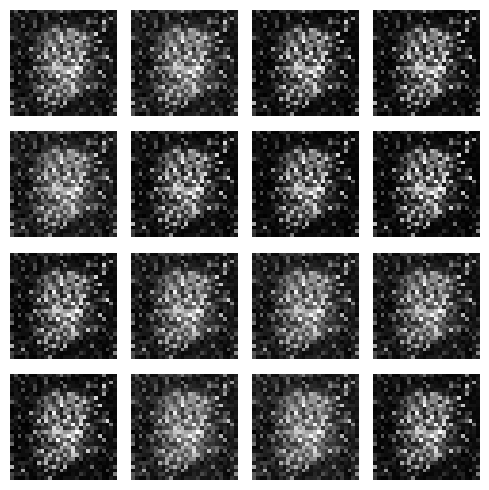

Epoch 10/150


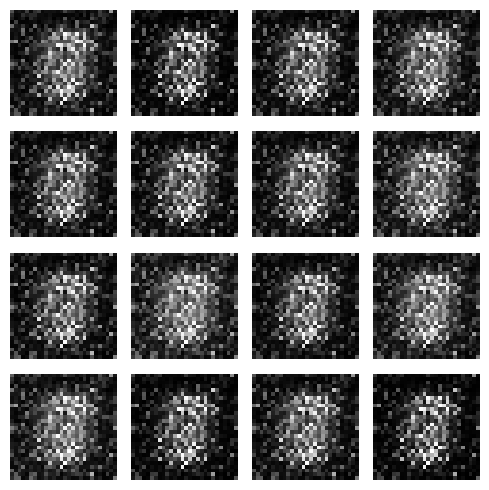

Epoch 11/150


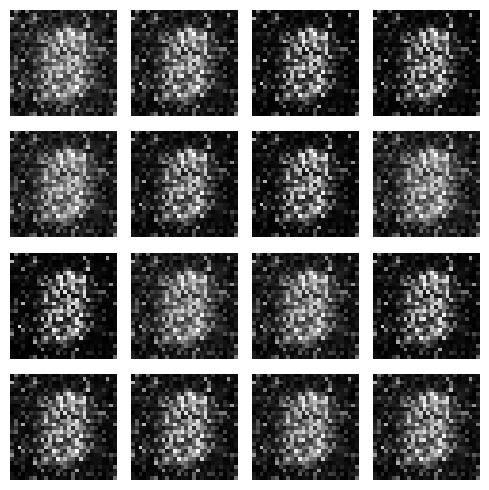

Epoch 12/150


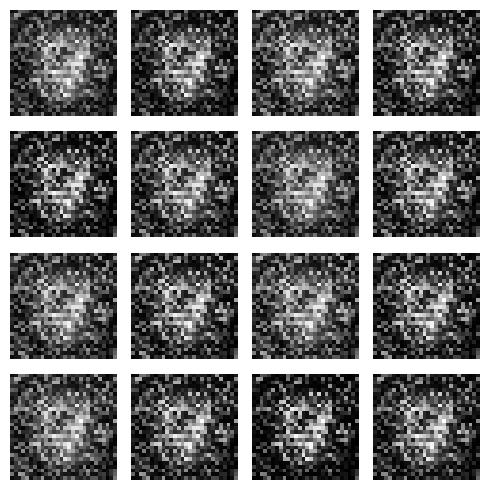

Epoch 13/150


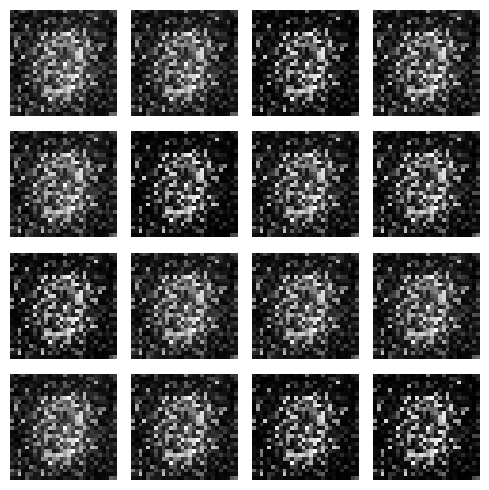

Epoch 14/150


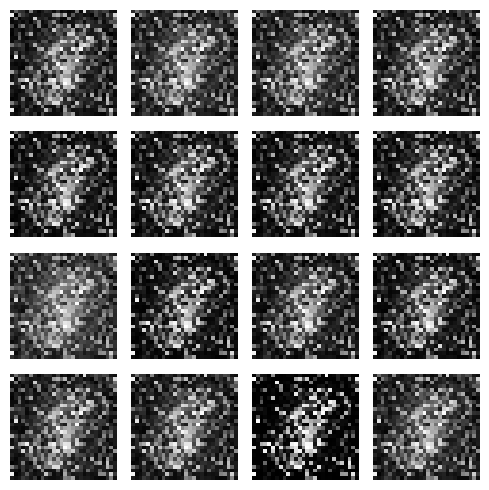

Epoch 15/150


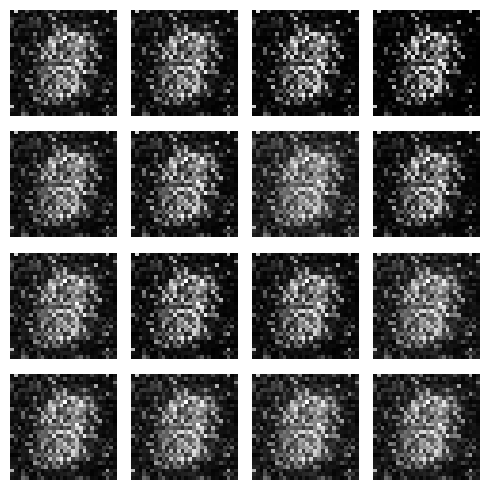

Epoch 16/150


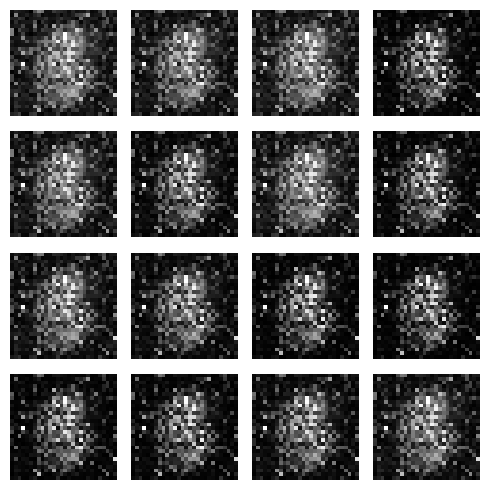

Epoch 17/150


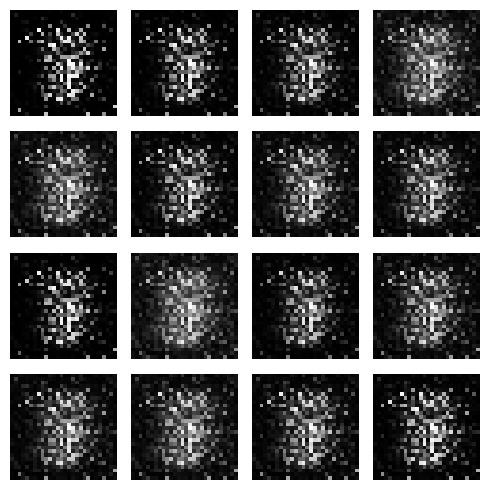

Epoch 18/150


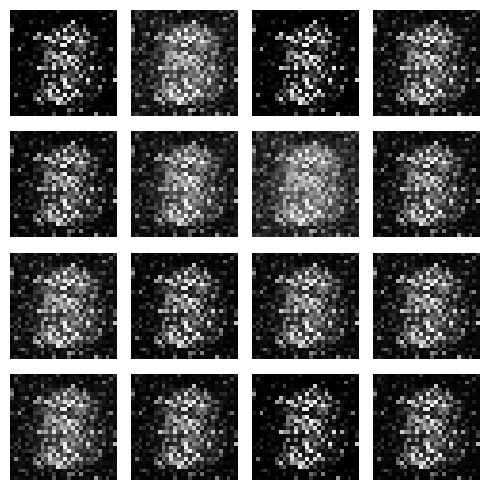

Epoch 19/150


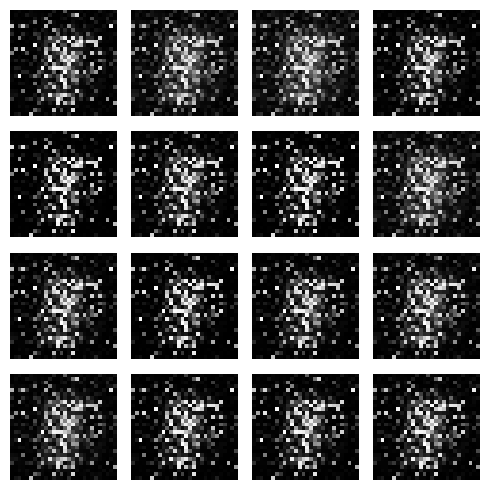

Epoch 20/150


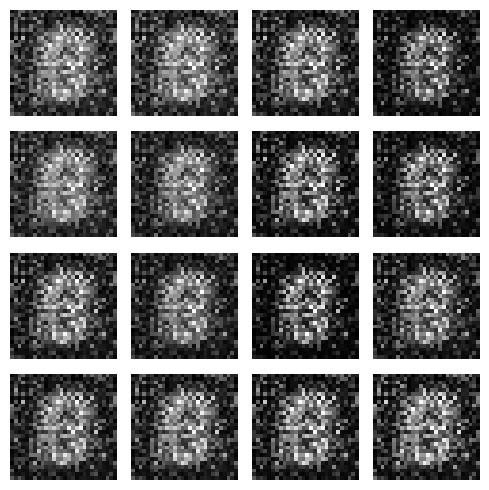

Epoch 21/150


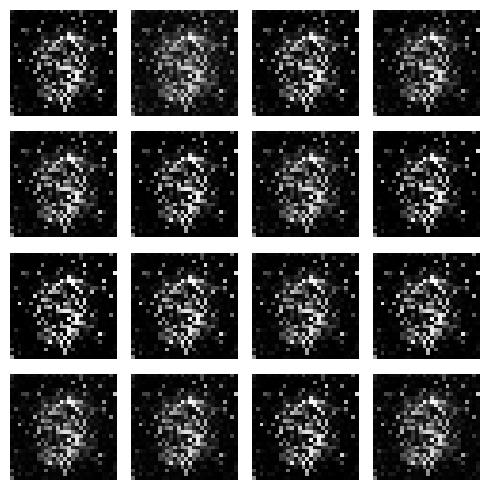

Epoch 22/150


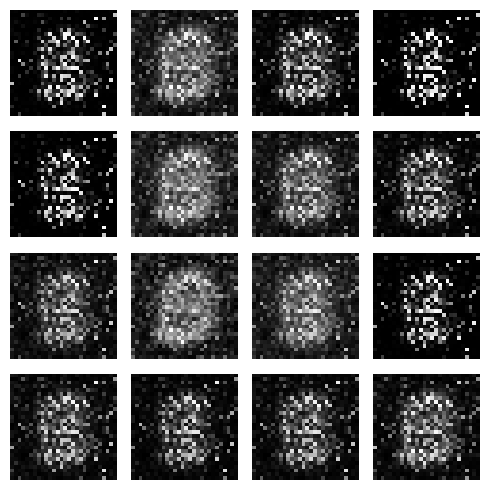

Epoch 23/150


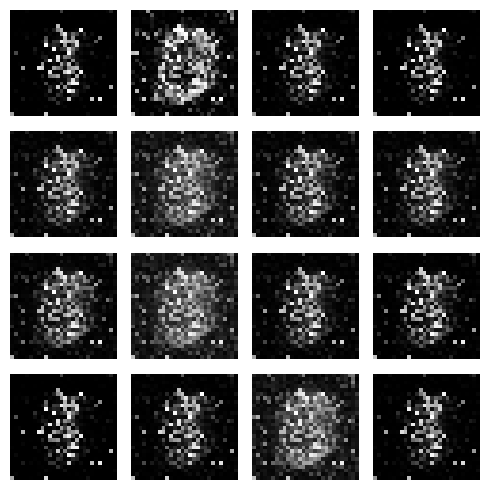

Epoch 24/150


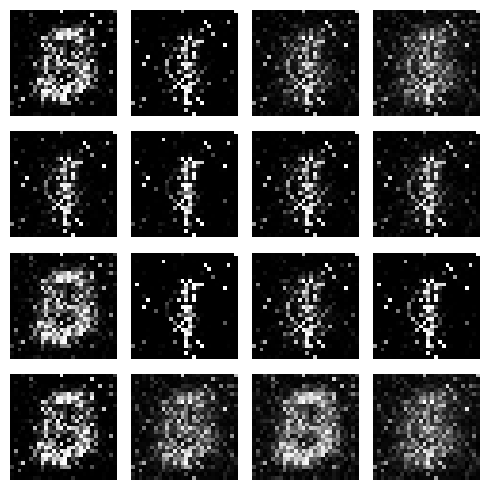

Epoch 25/150


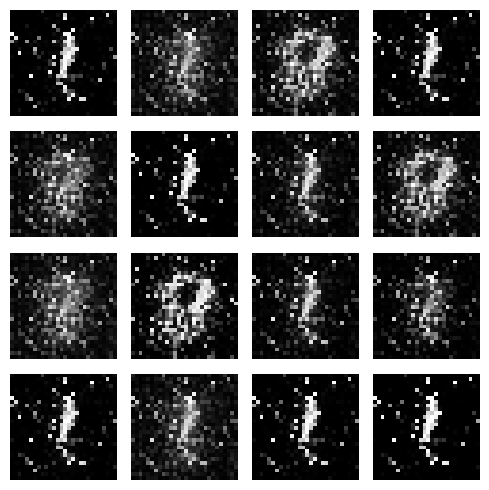

Epoch 26/150


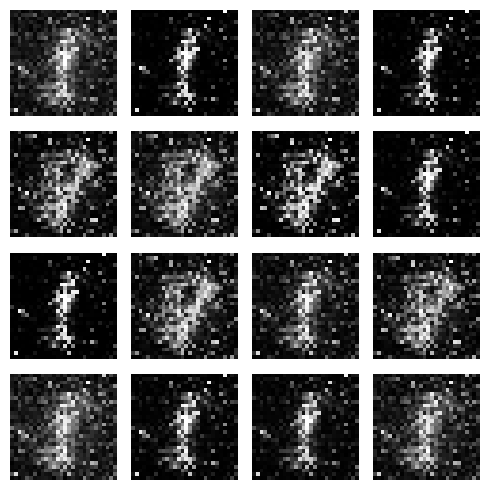

Epoch 27/150


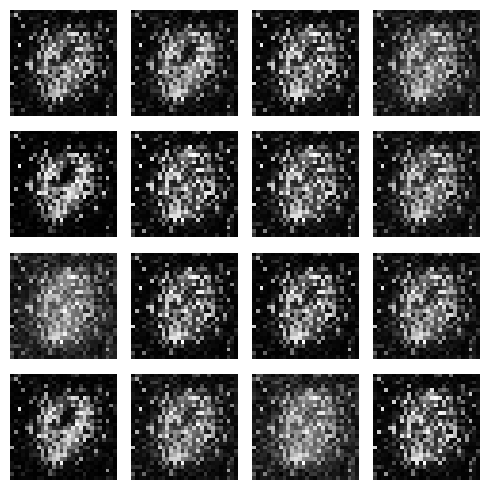

Epoch 28/150


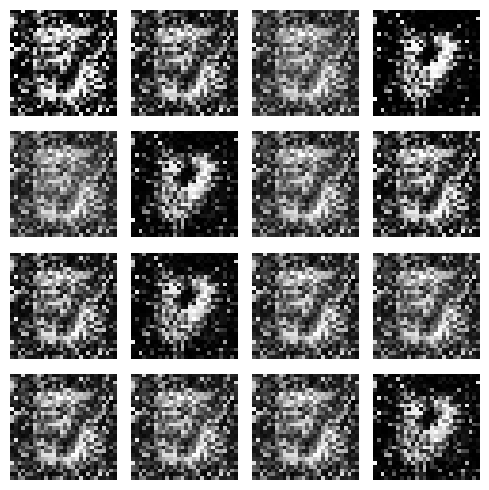

Epoch 29/150


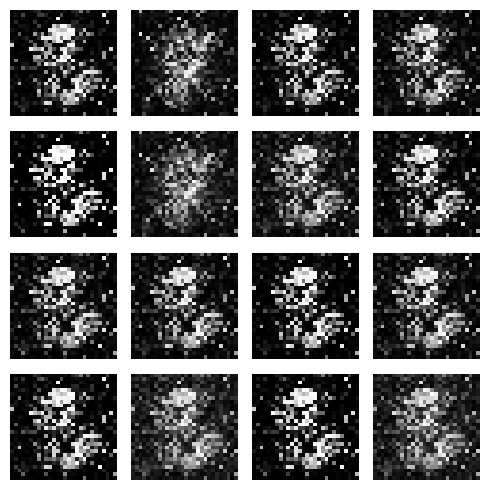

Epoch 30/150


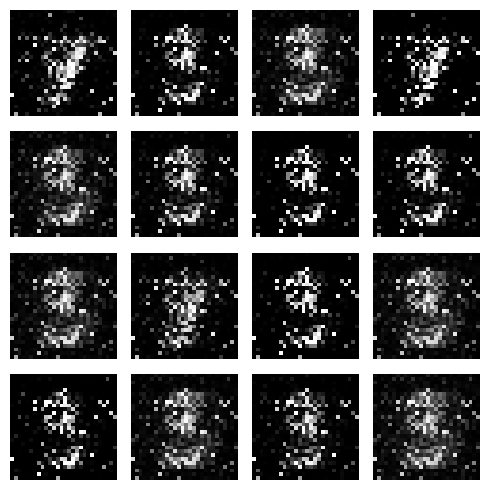

Epoch 31/150


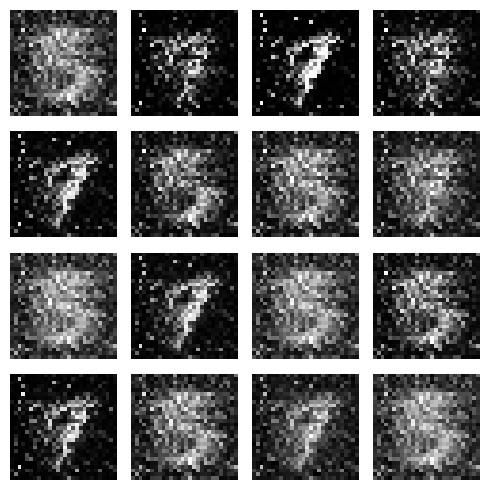

Epoch 32/150


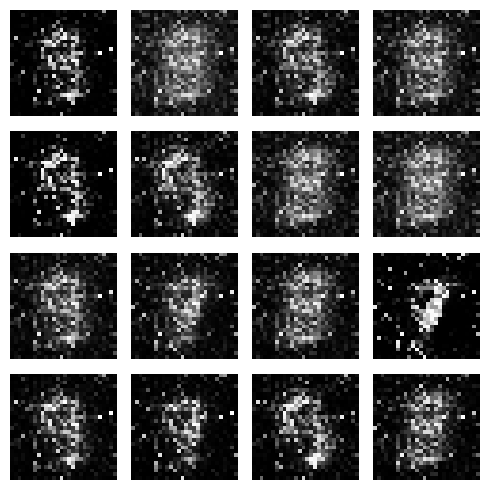

Epoch 33/150


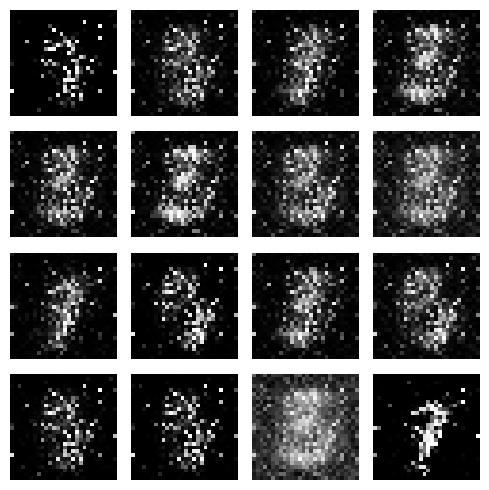

Epoch 34/150


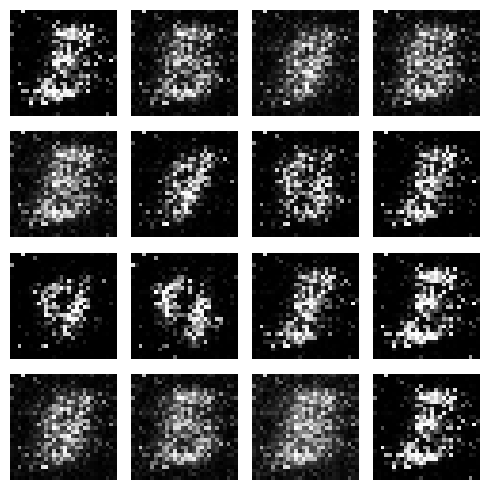

Epoch 35/150


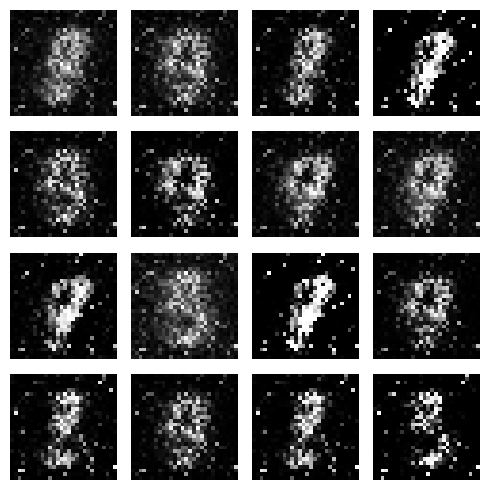

Epoch 36/150


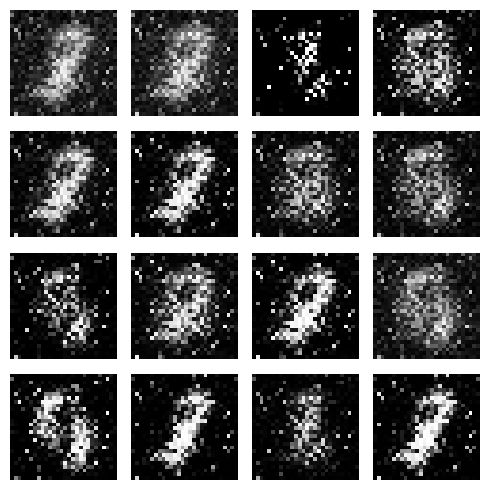

Epoch 37/150


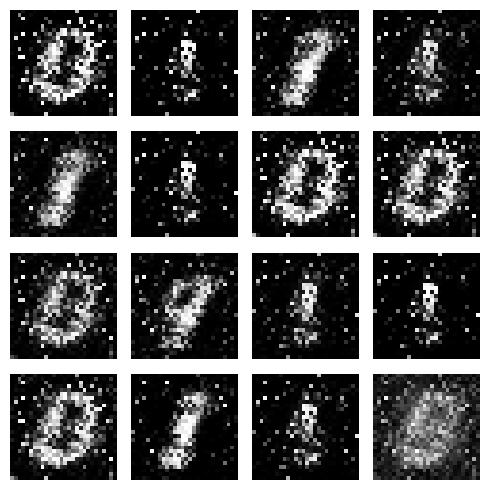

Epoch 38/150


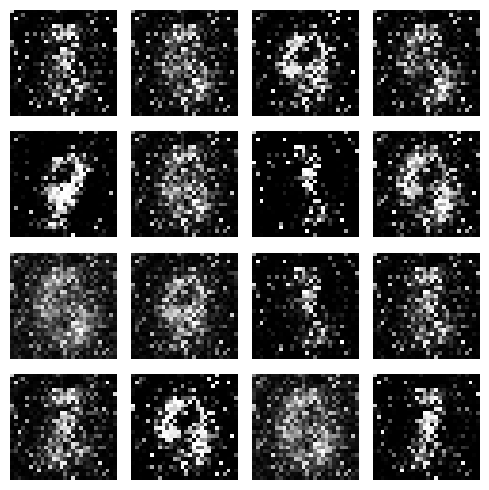

Epoch 39/150


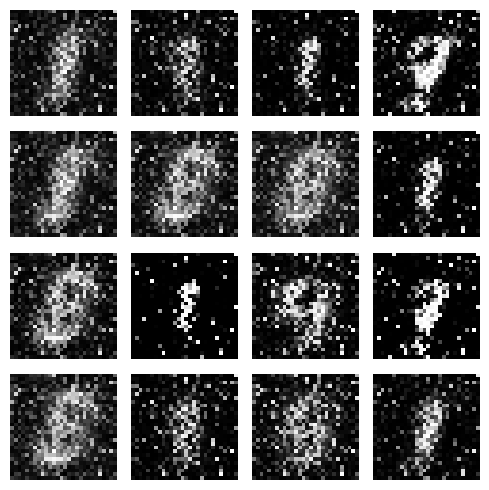

Epoch 40/150


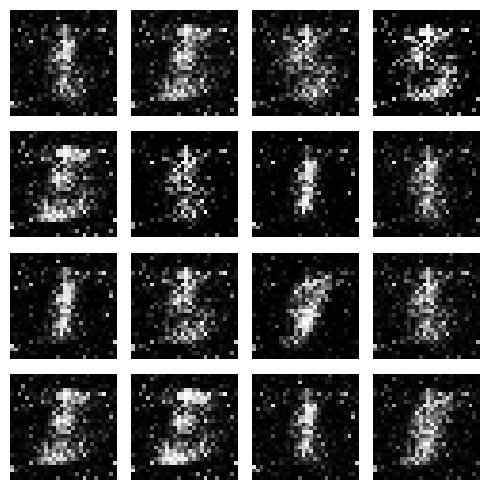

Epoch 41/150


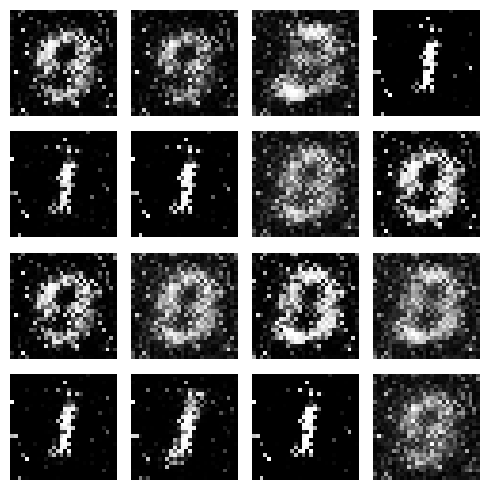

Epoch 42/150


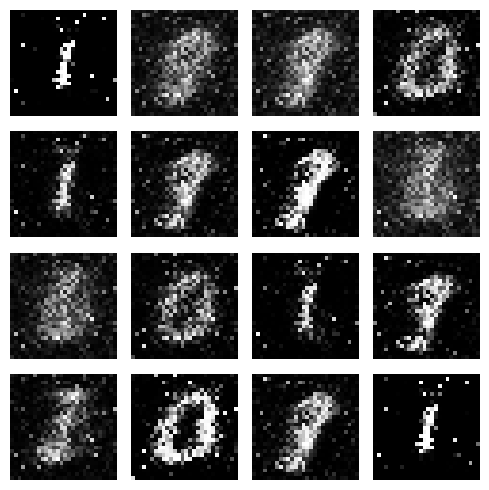

Epoch 43/150


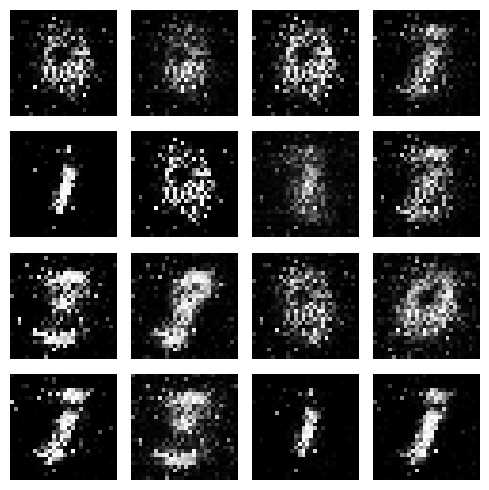

Epoch 44/150


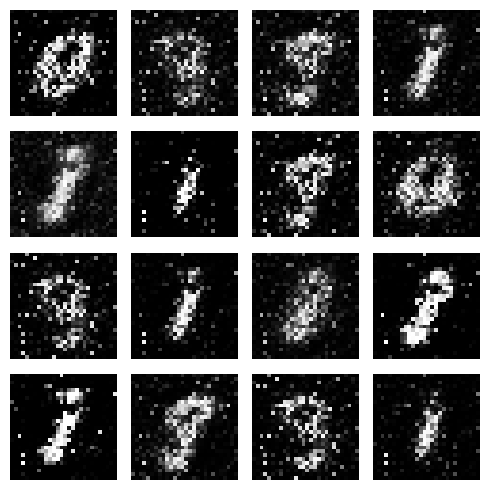

Epoch 45/150


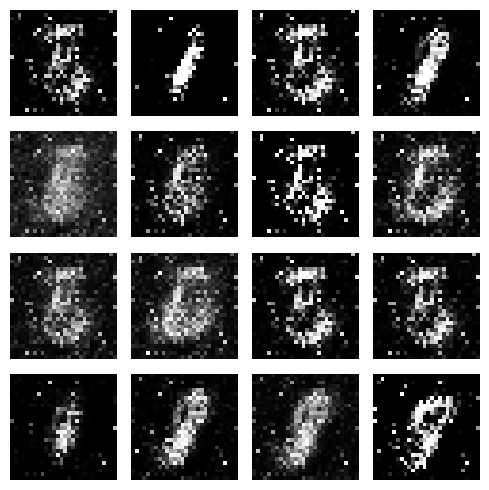

Epoch 46/150


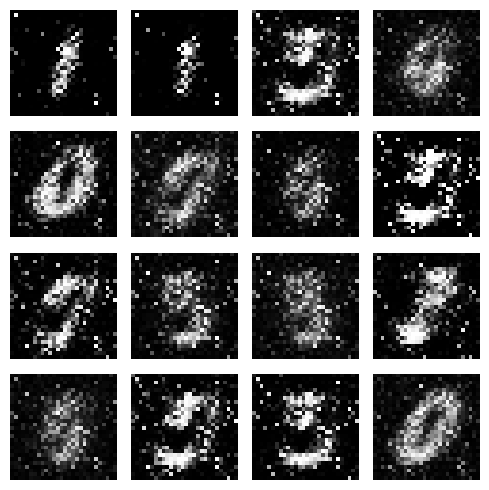

Epoch 47/150


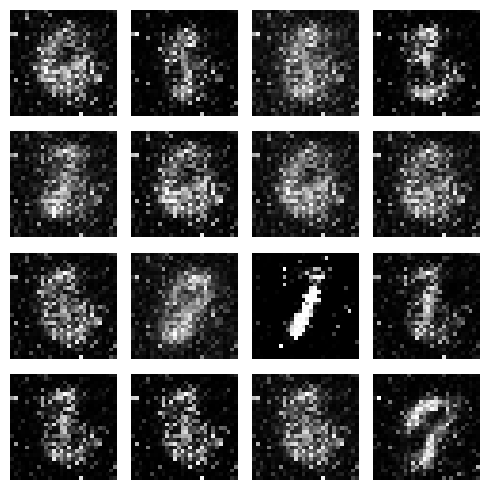

Epoch 48/150


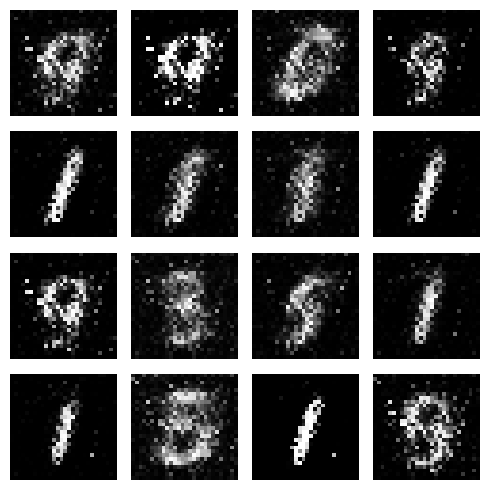

Epoch 49/150


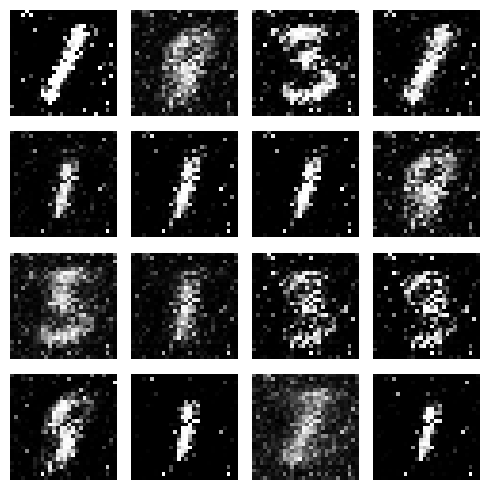

Epoch 50/150


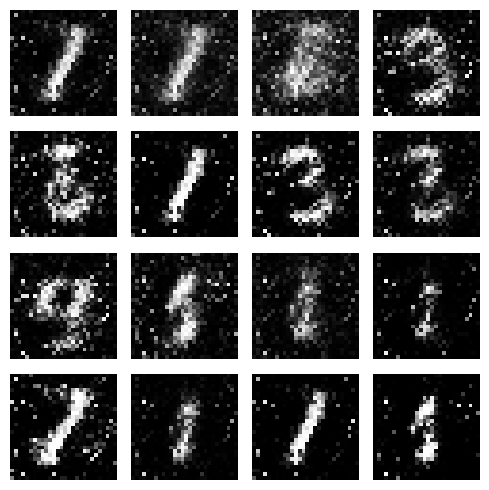

Epoch 51/150


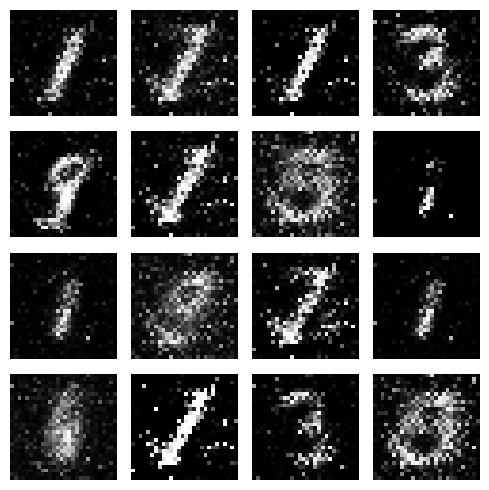

Epoch 52/150


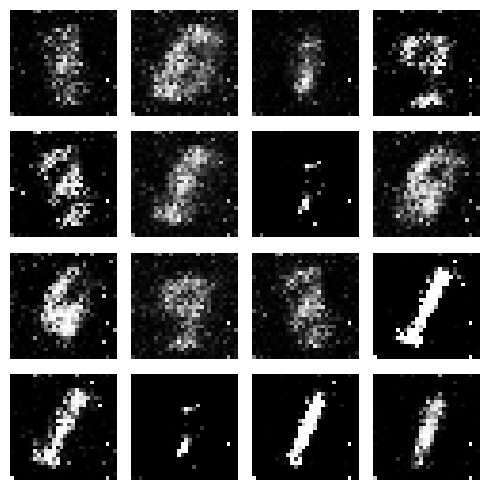

Epoch 53/150


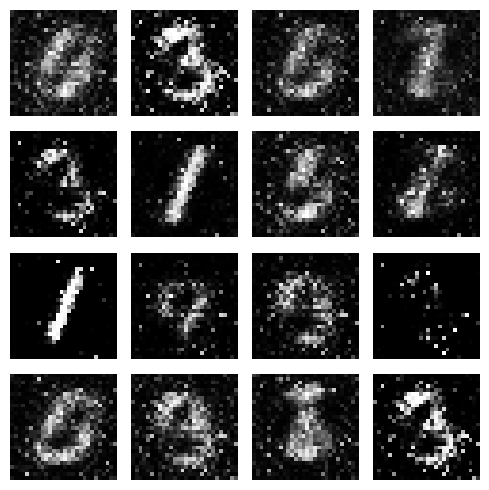

Epoch 54/150


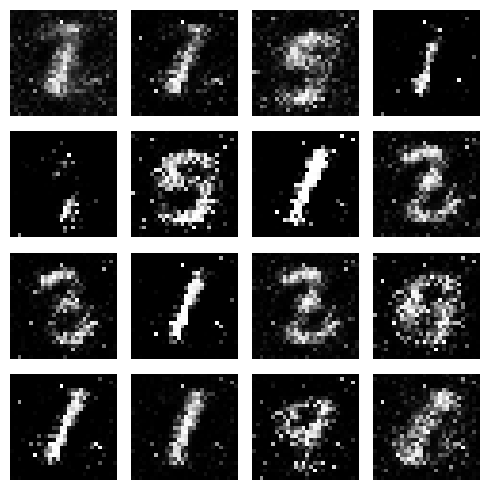

Epoch 55/150


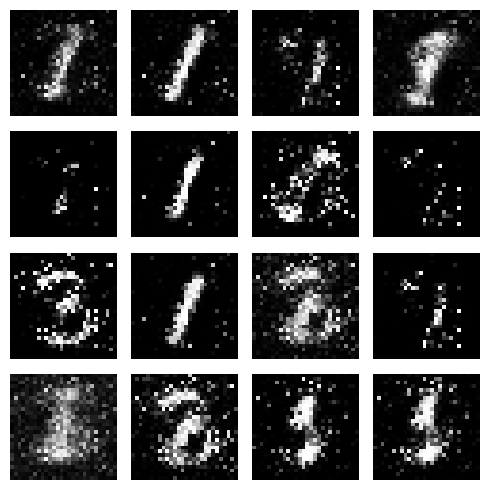

Epoch 56/150


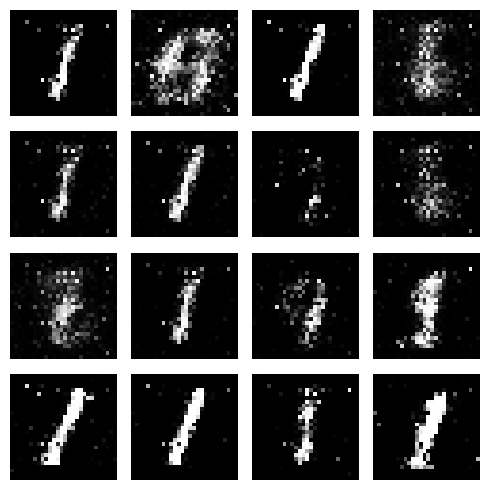

Epoch 57/150


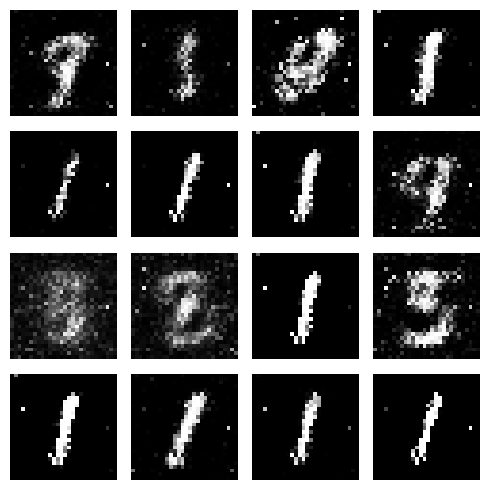

Epoch 58/150


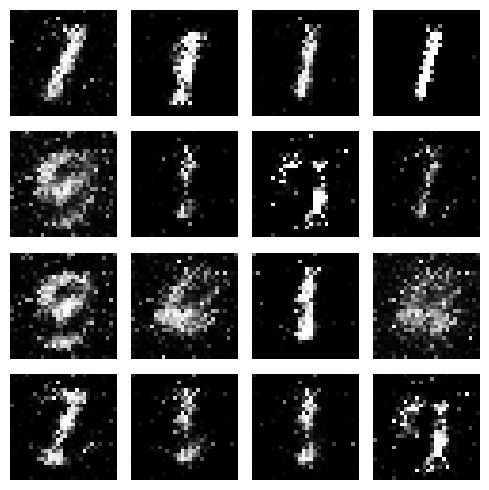

Epoch 59/150


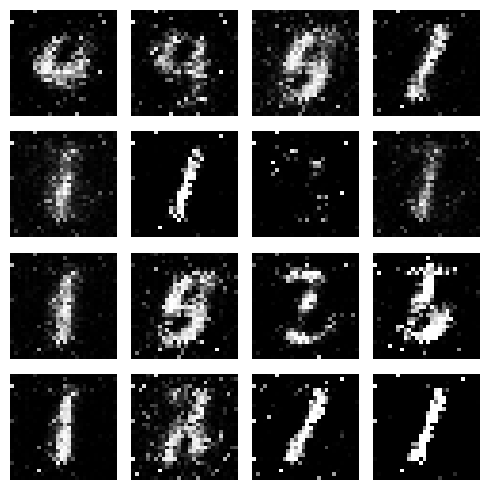

Epoch 60/150


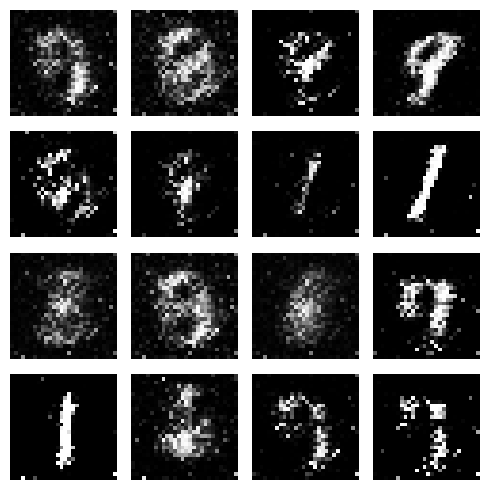

Epoch 61/150


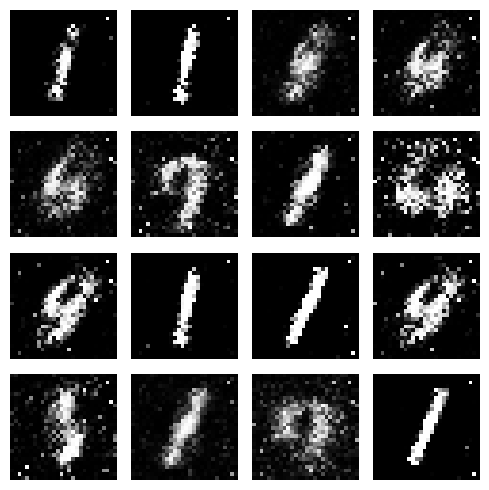

Epoch 62/150


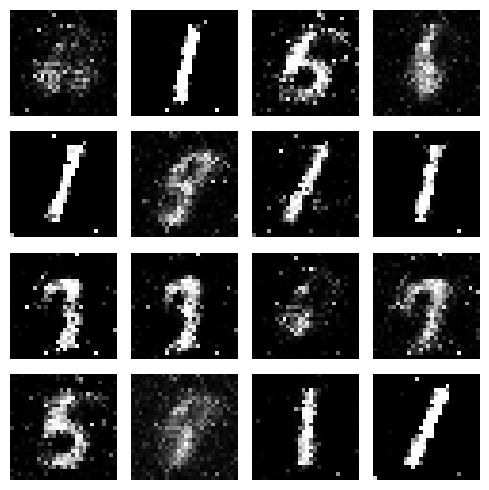

Epoch 63/150


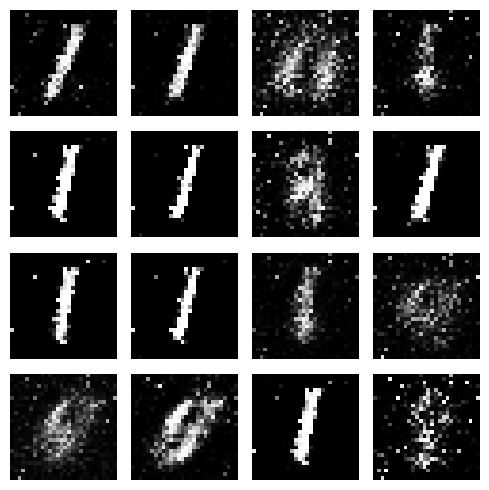

Epoch 64/150


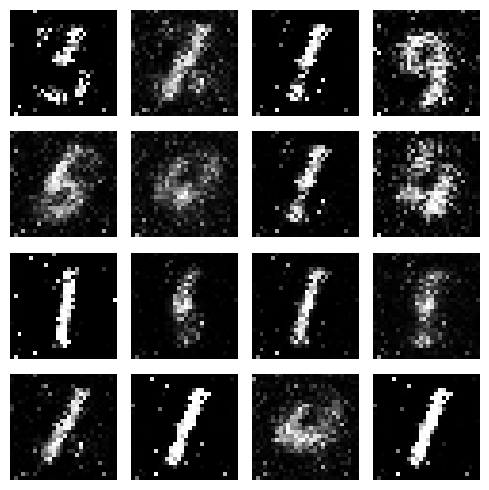

Epoch 65/150


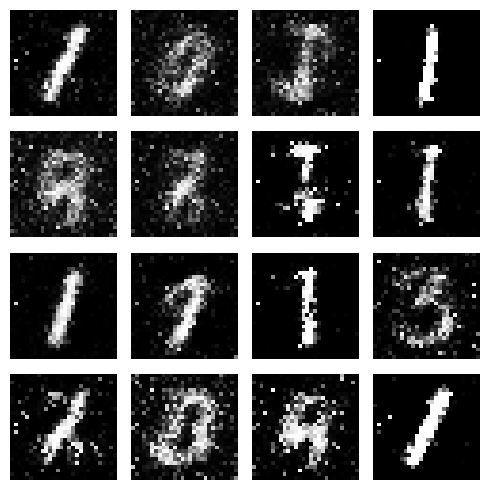

Epoch 66/150


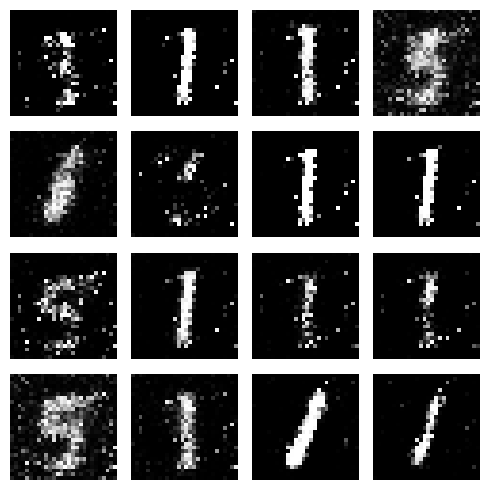

Epoch 67/150


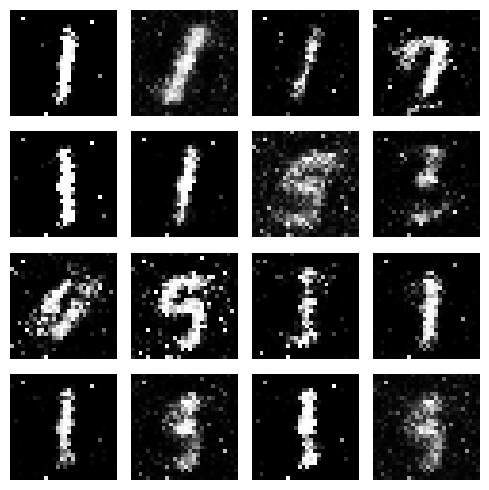

Epoch 68/150


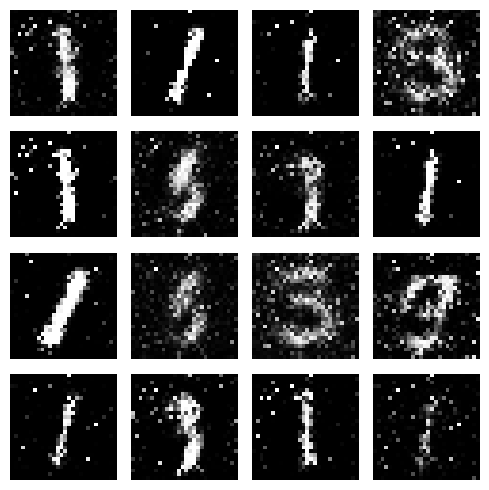

Epoch 69/150


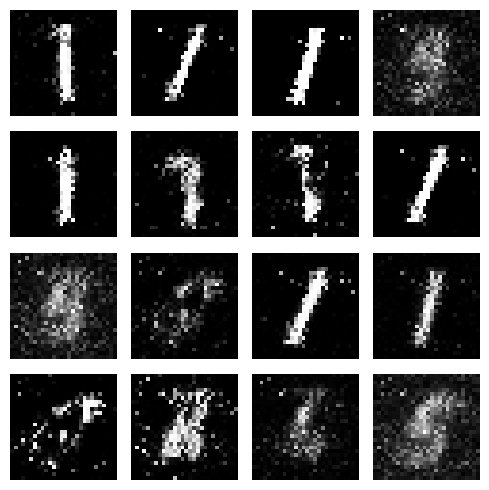

Epoch 70/150


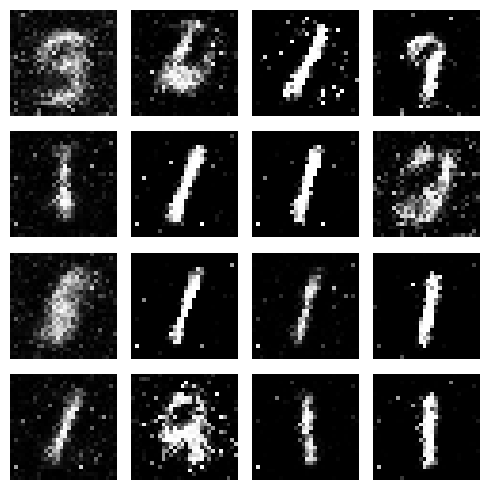

Epoch 71/150


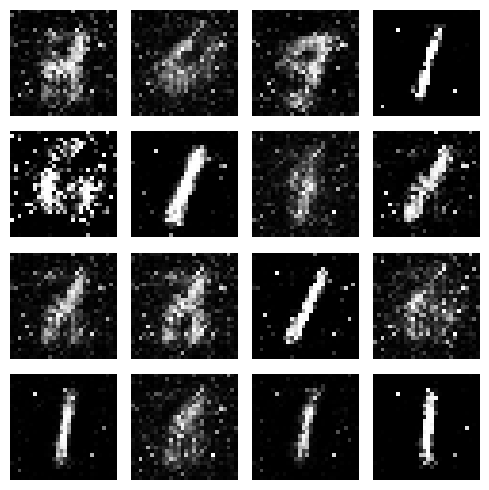

Epoch 72/150


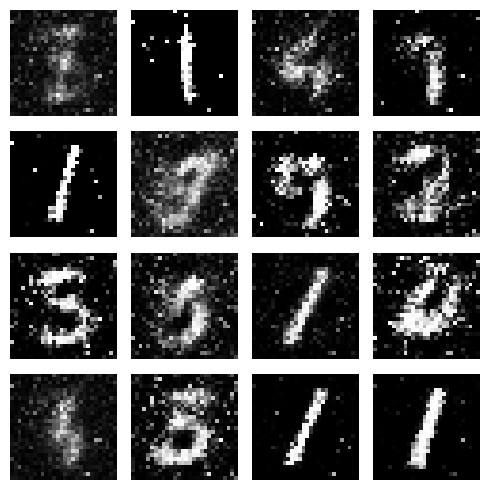

Epoch 73/150


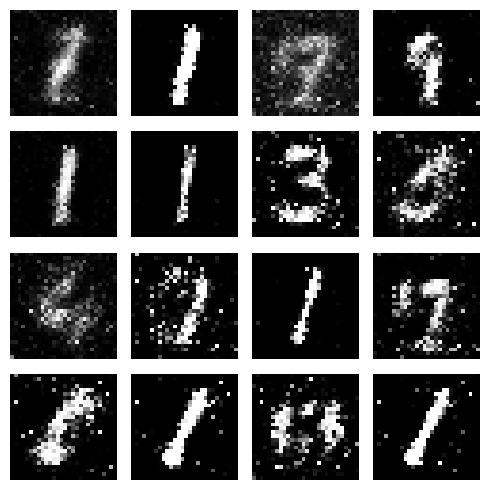

Epoch 74/150


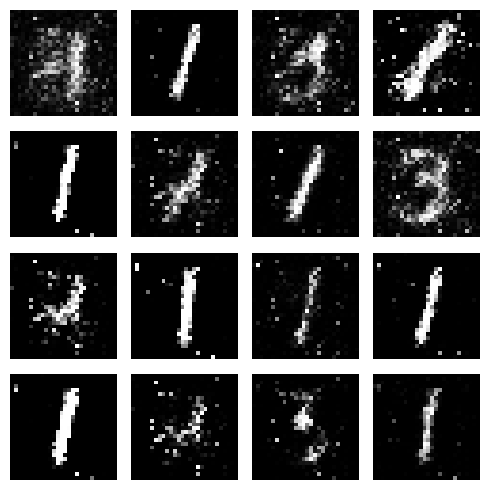

Epoch 75/150


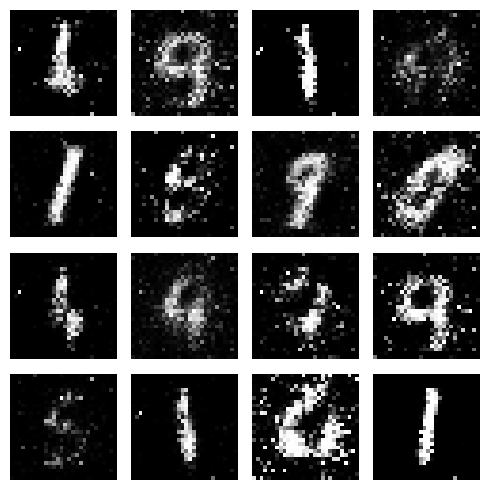

Epoch 76/150


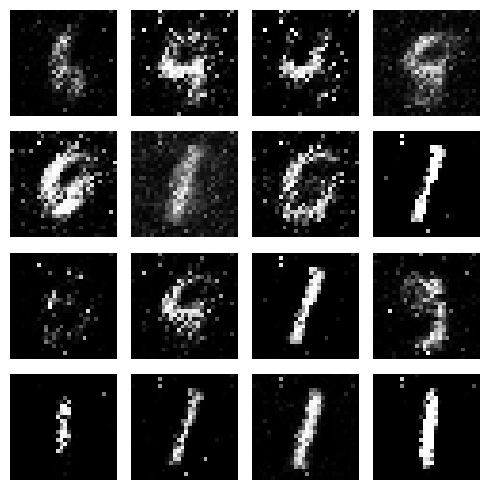

Epoch 77/150


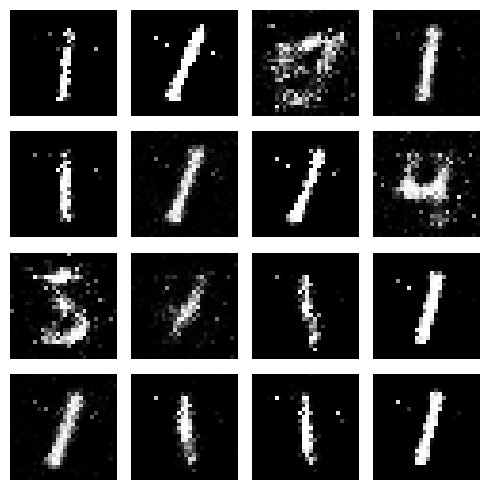

Epoch 78/150


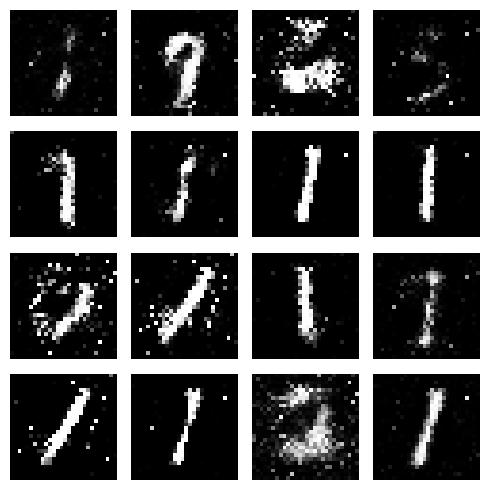

Epoch 79/150


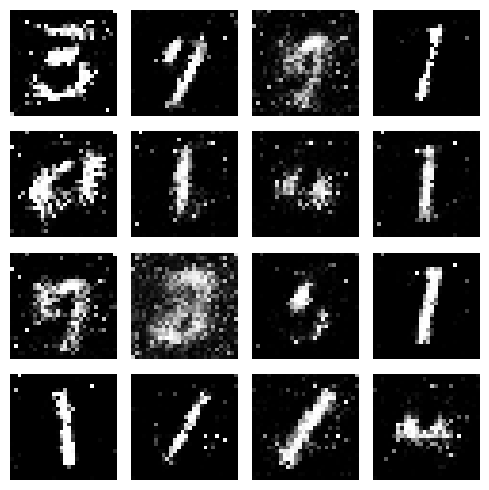

Epoch 80/150


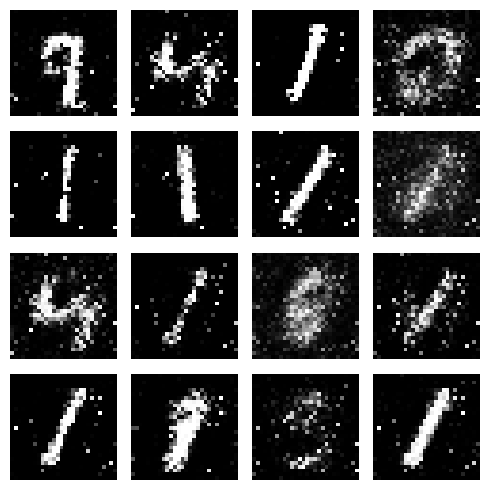

Epoch 81/150


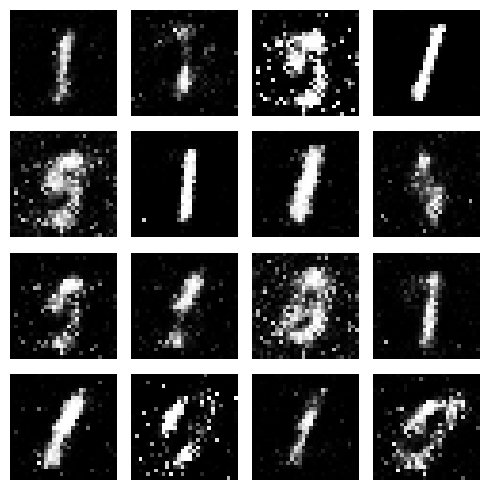

Epoch 82/150


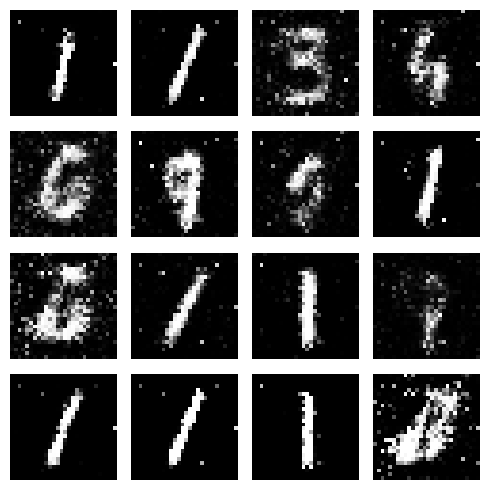

Epoch 83/150


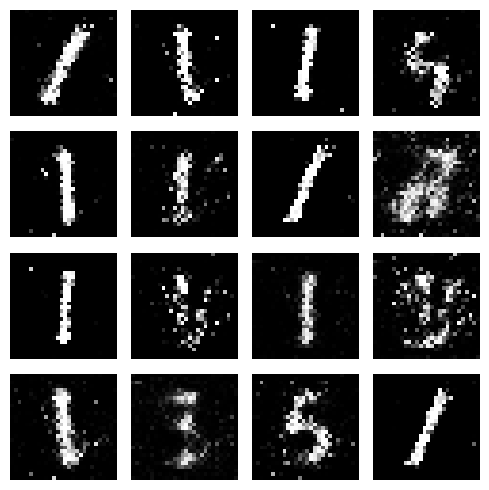

Epoch 84/150


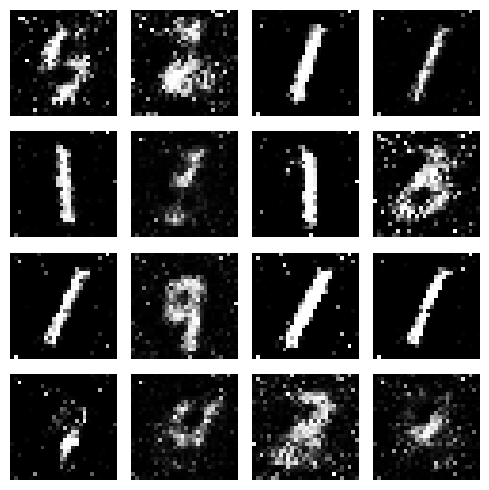

Epoch 85/150


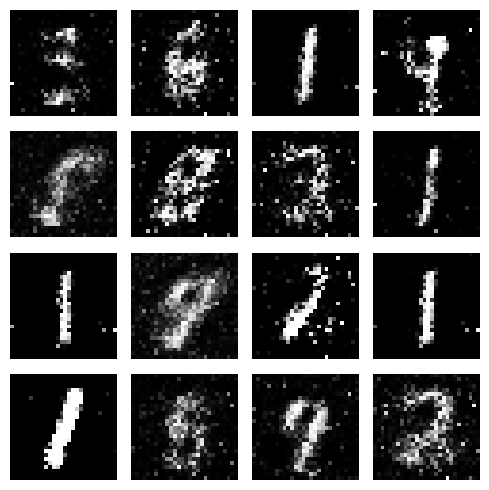

Epoch 86/150


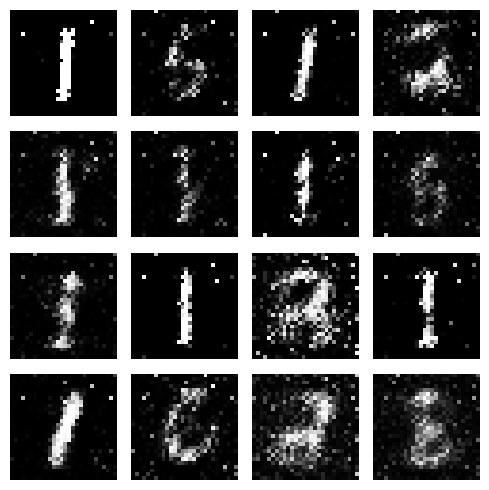

Epoch 87/150


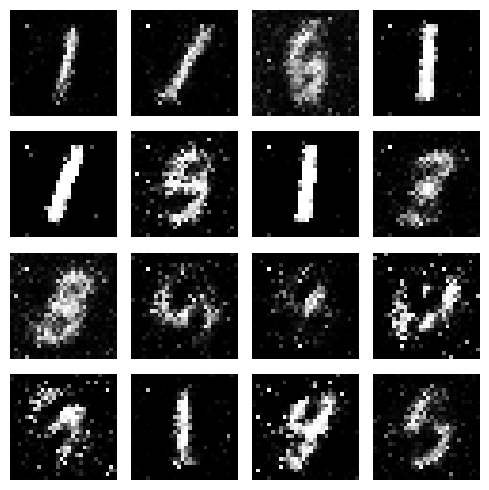

Epoch 88/150


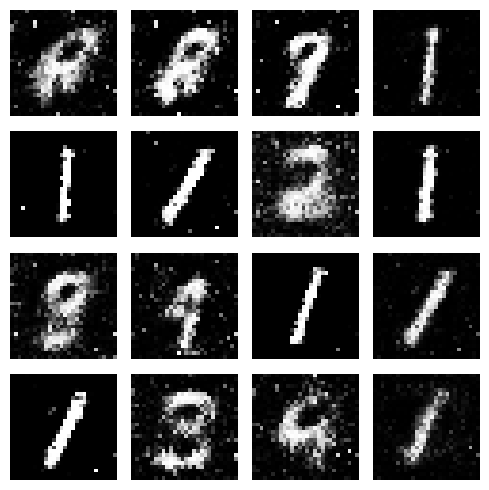

Epoch 89/150


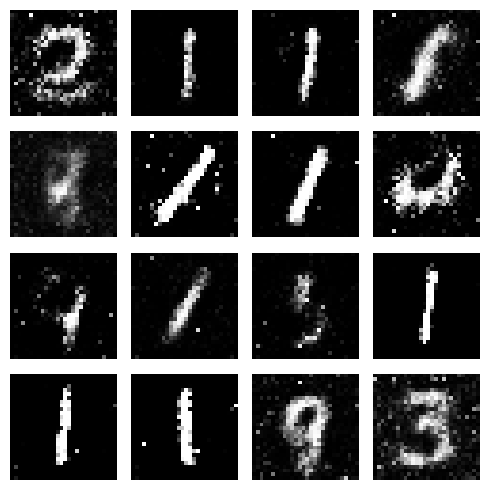

Epoch 90/150


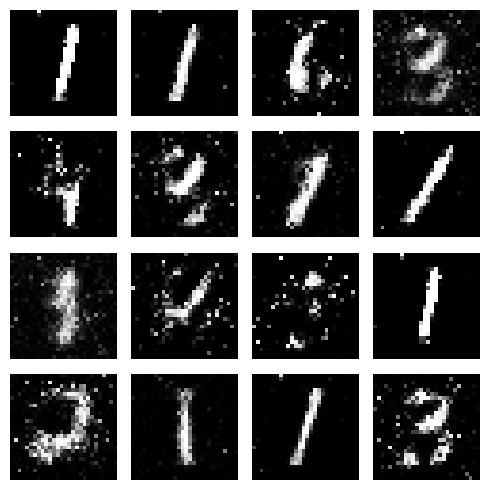

Epoch 91/150


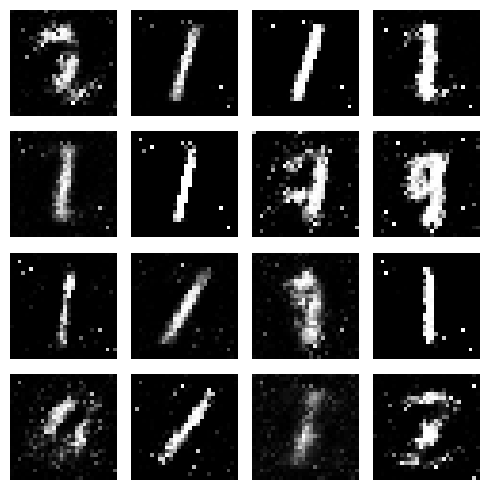

Epoch 92/150


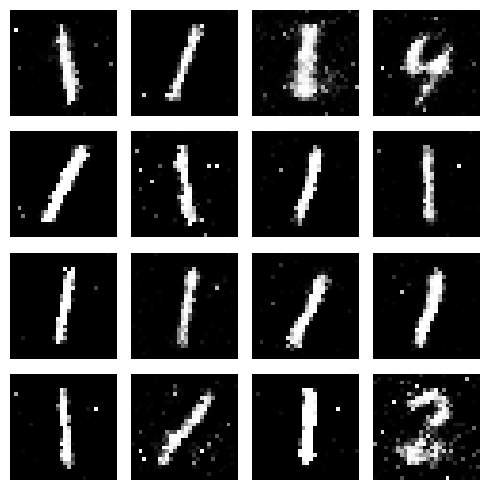

Epoch 93/150


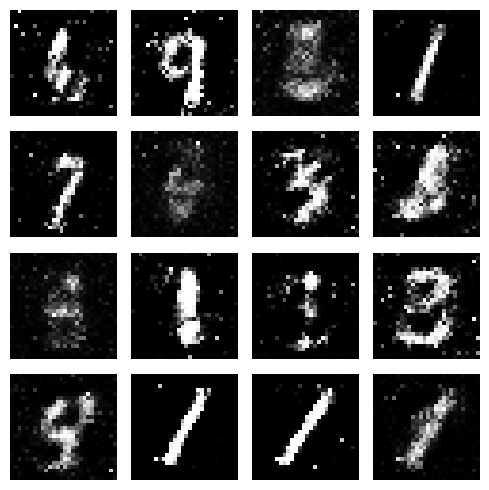

Epoch 94/150


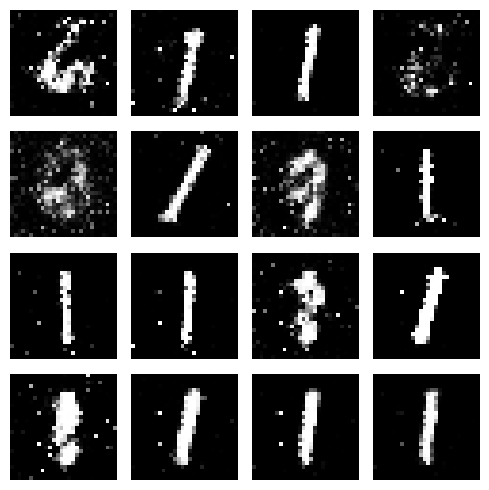

Epoch 95/150


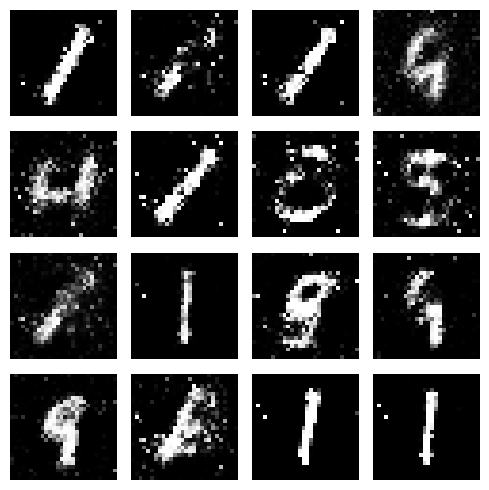

Epoch 96/150


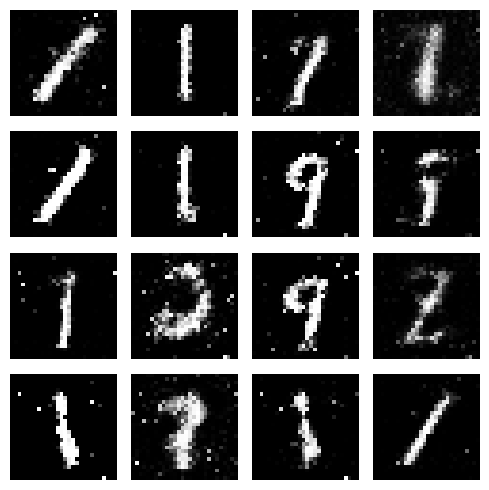

Epoch 101/150


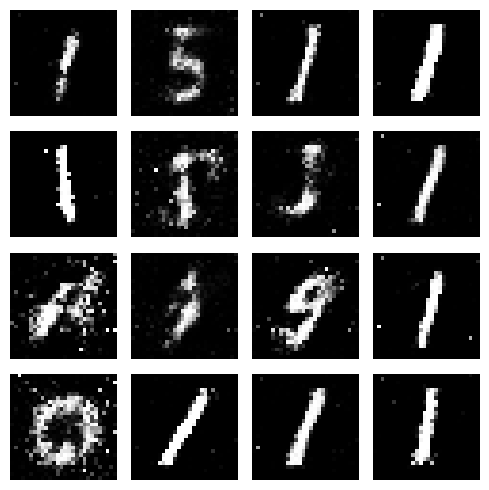

Epoch 102/150


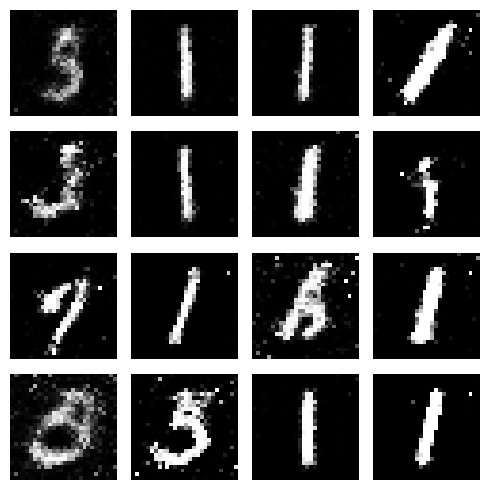

Epoch 103/150


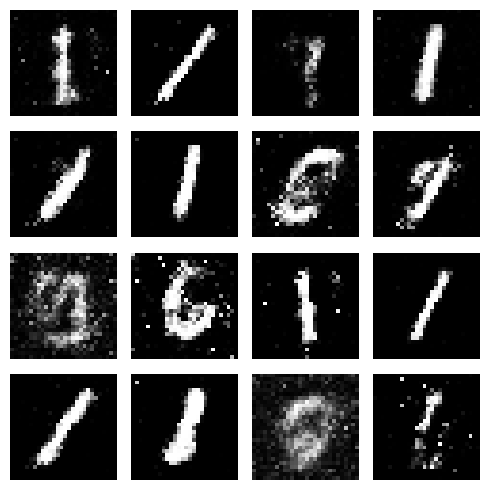

Epoch 104/150


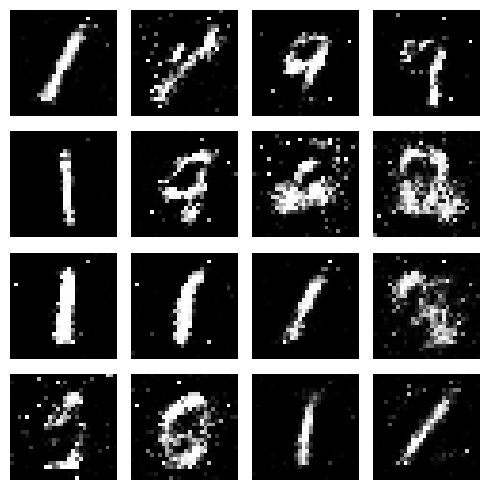

Epoch 105/150


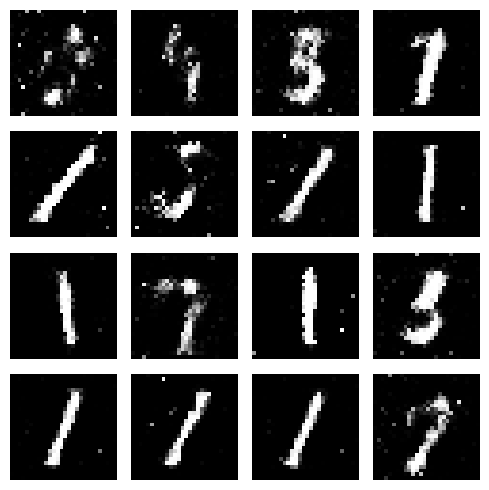

Epoch 106/150


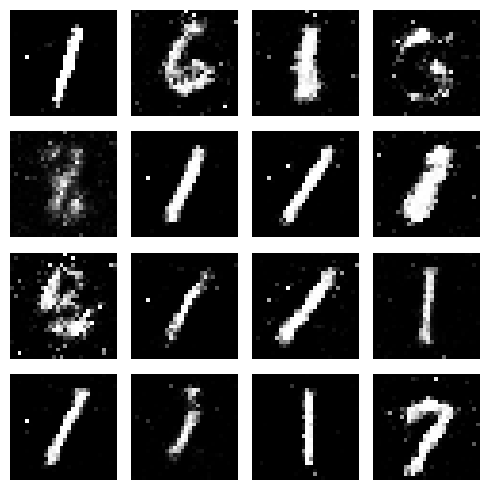

Epoch 107/150


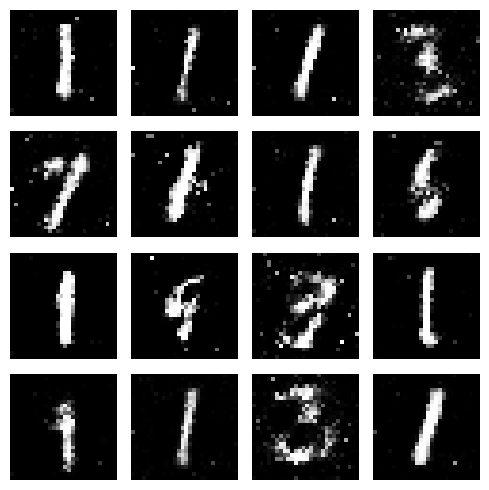

Epoch 108/150


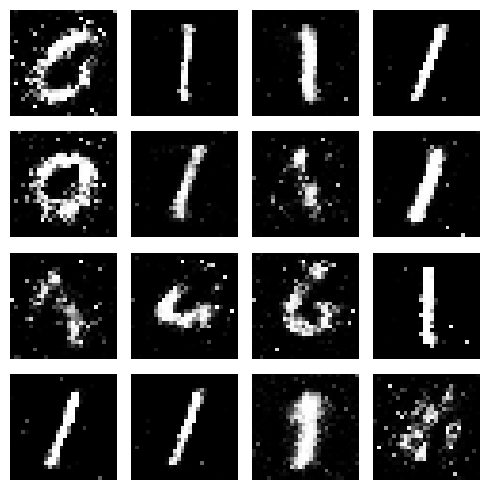

Epoch 109/150


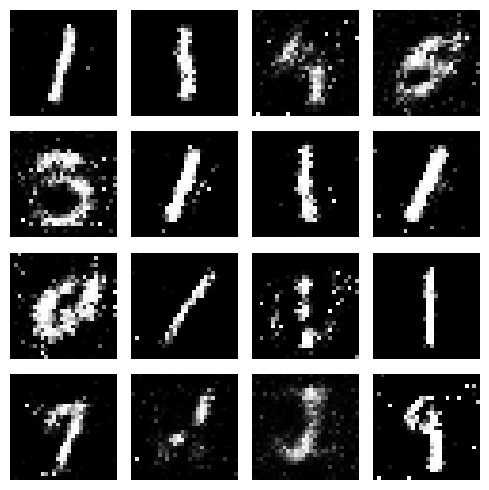

Epoch 110/150


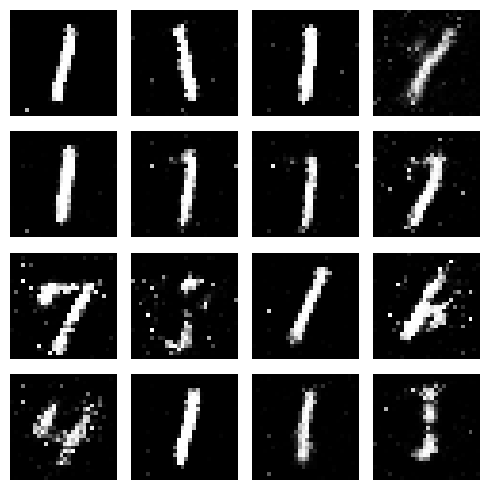

Epoch 111/150


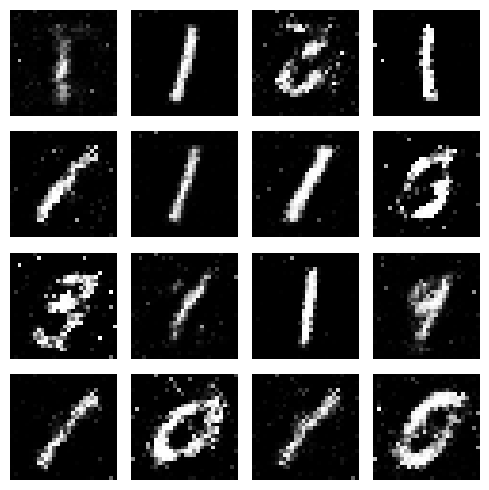

Epoch 112/150


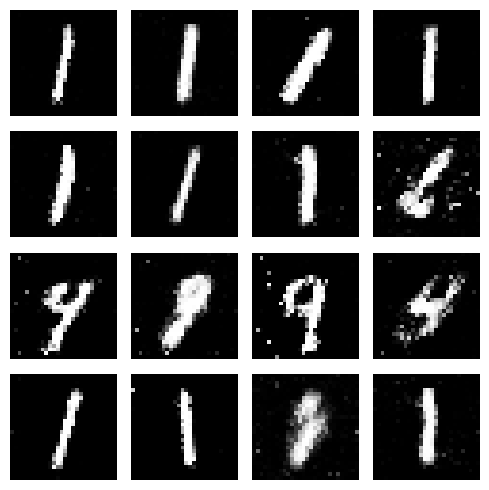

Epoch 113/150


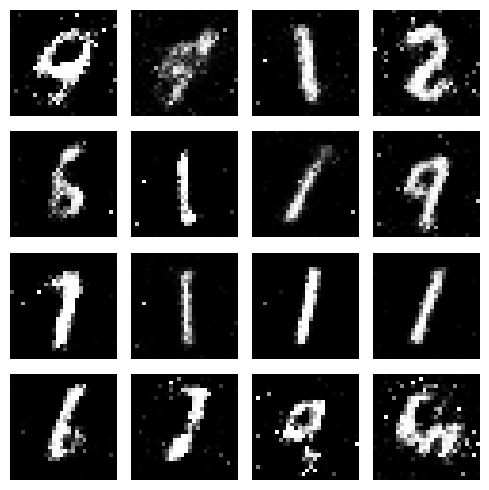

Epoch 114/150


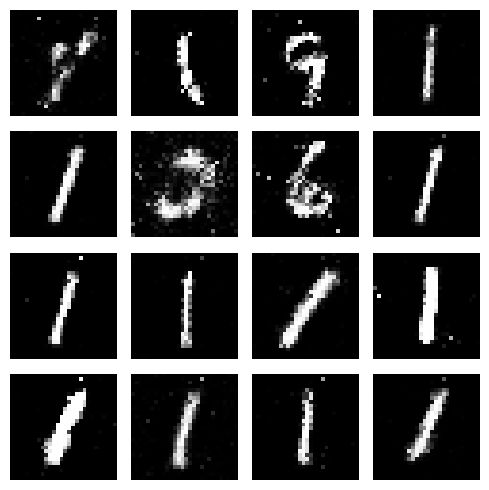

Epoch 115/150


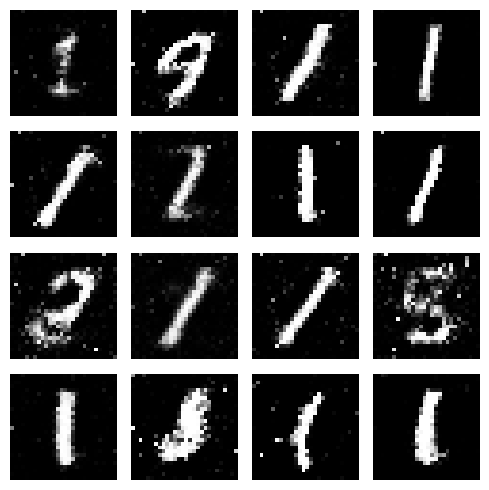

Epoch 116/150


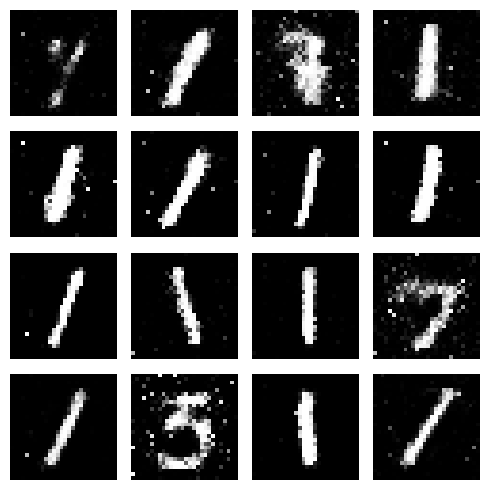

Epoch 117/150


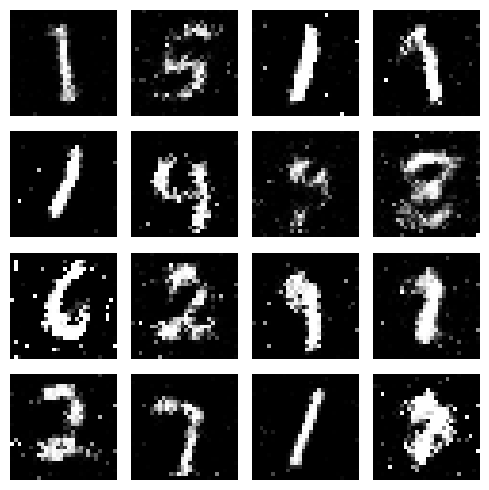

Epoch 118/150


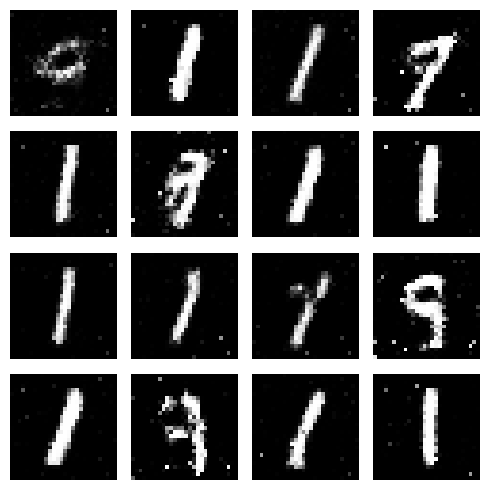

Epoch 119/150


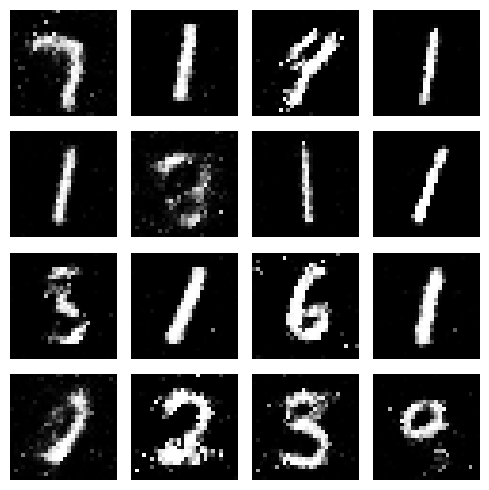

Epoch 120/150


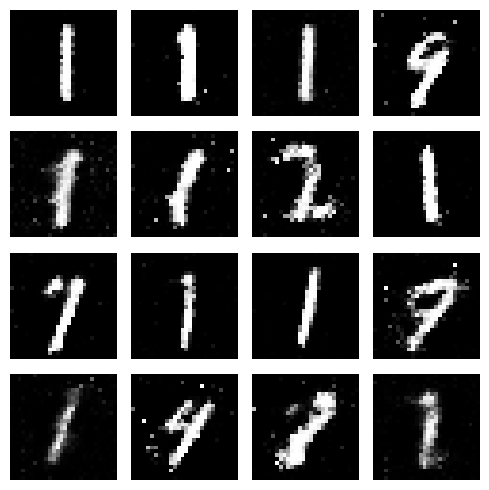

Epoch 121/150


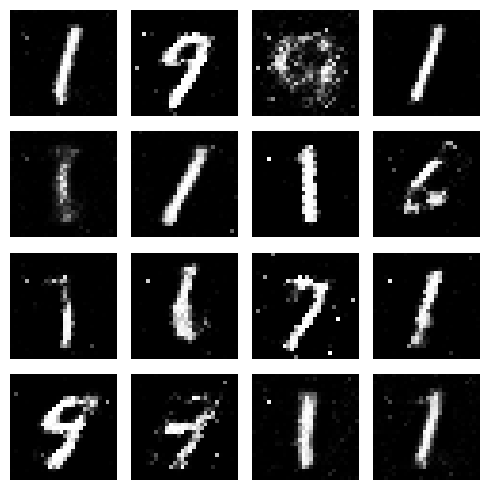

Epoch 122/150


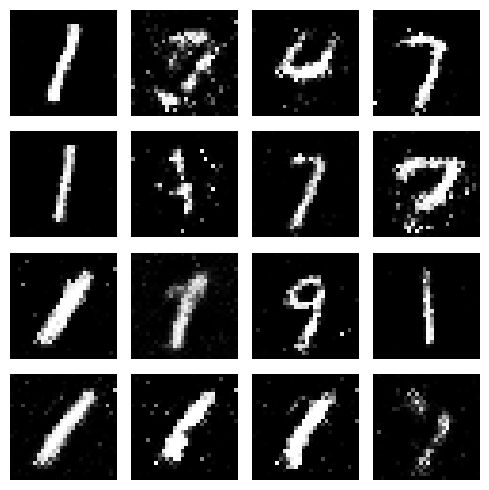

Epoch 123/150


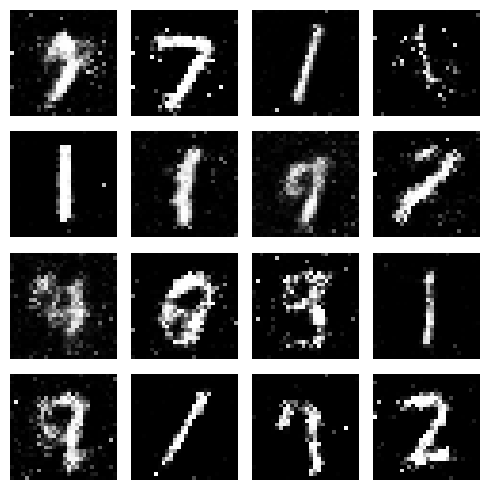

Epoch 124/150


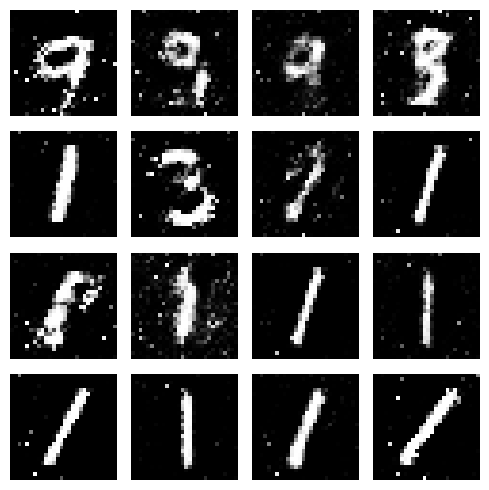

Epoch 125/150


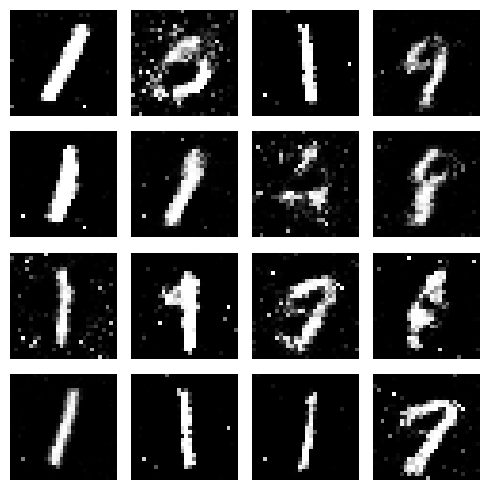

Epoch 126/150


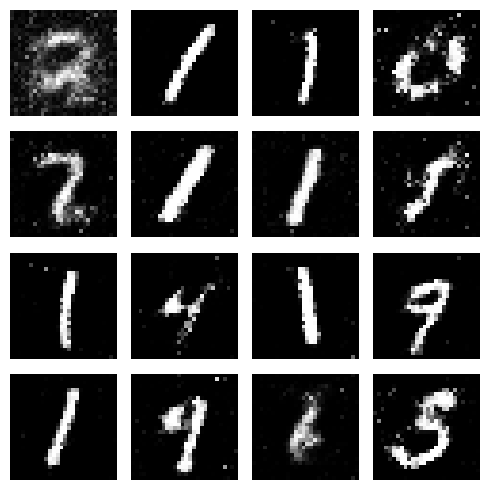

Epoch 127/150


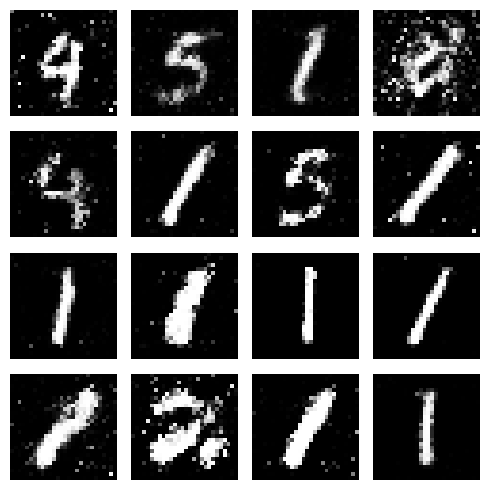

Epoch 128/150


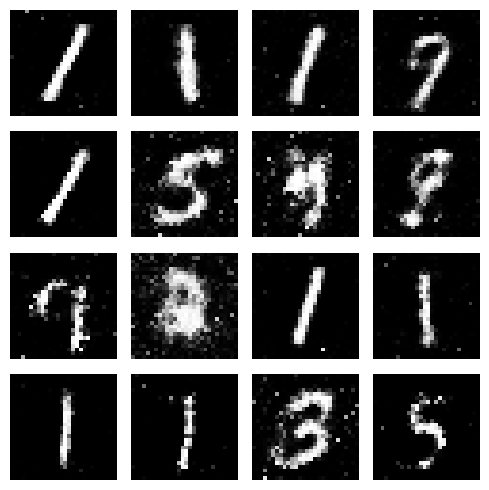

Epoch 129/150


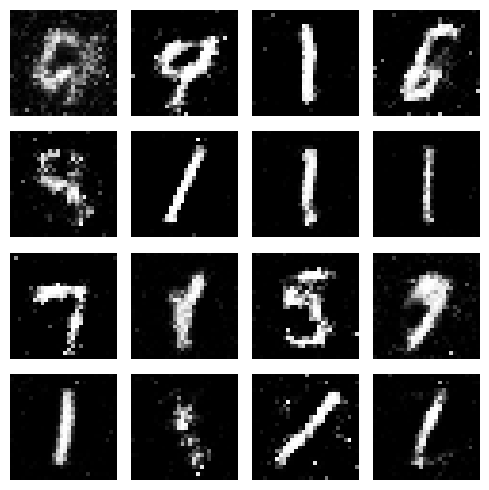

Epoch 130/150


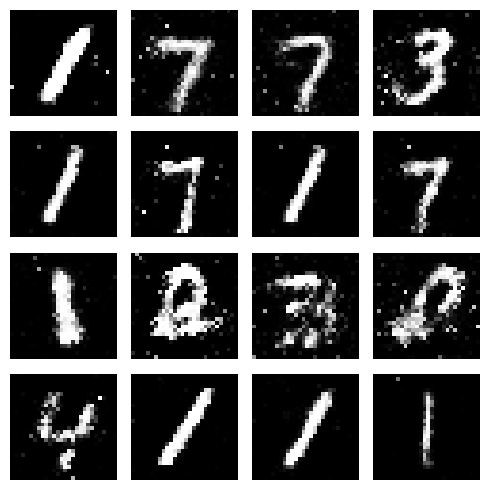

Epoch 131/150


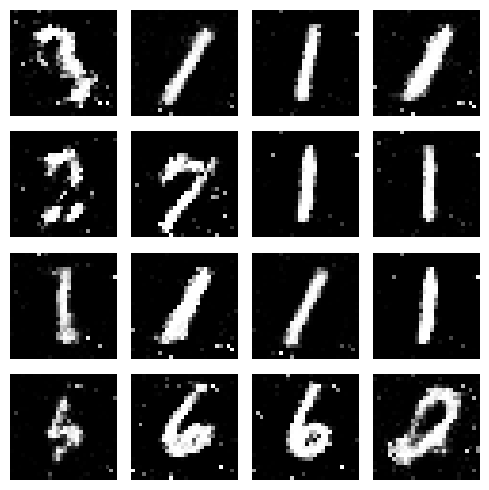

Epoch 132/150


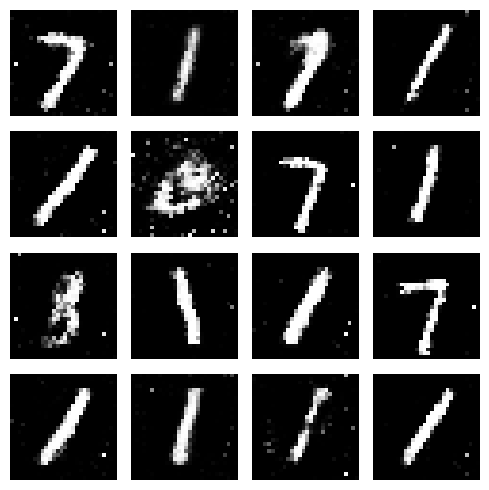

Epoch 133/150


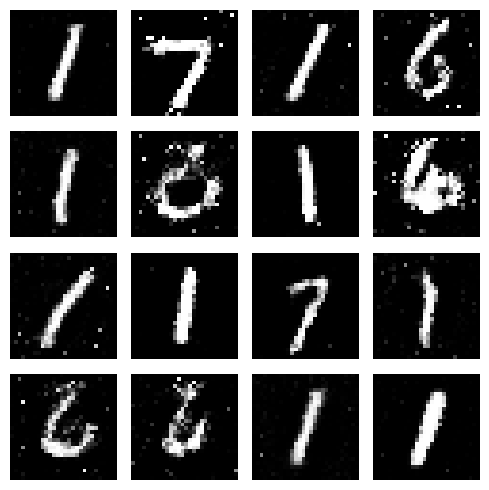

Epoch 134/150


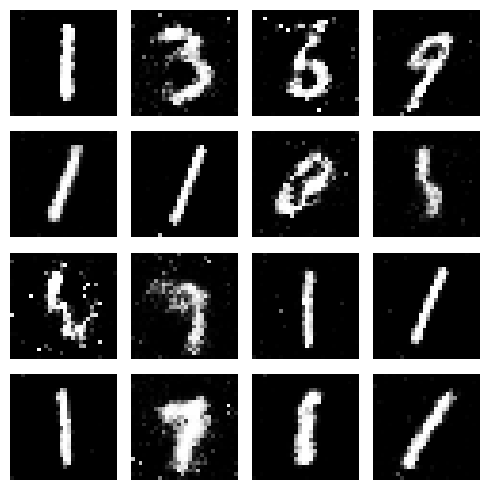

Epoch 135/150


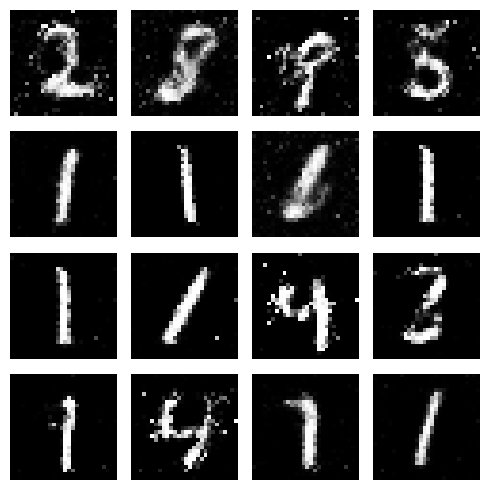

Epoch 136/150


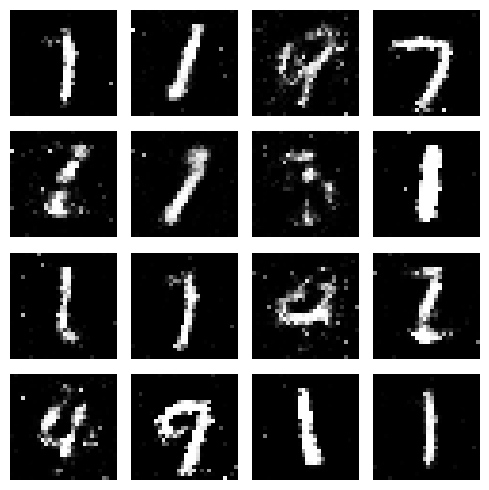

Epoch 137/150


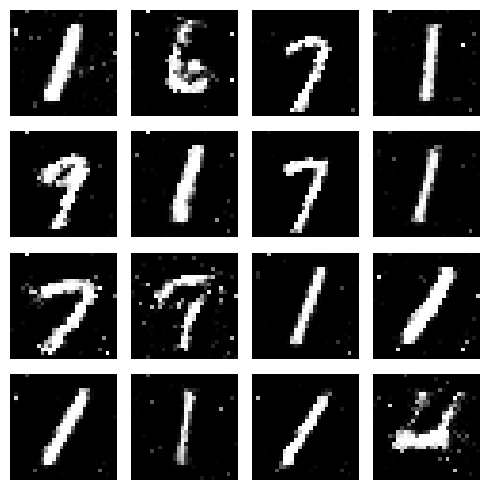

Epoch 138/150


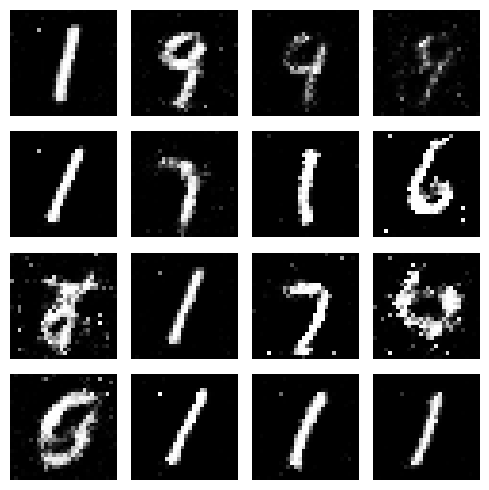

Epoch 139/150


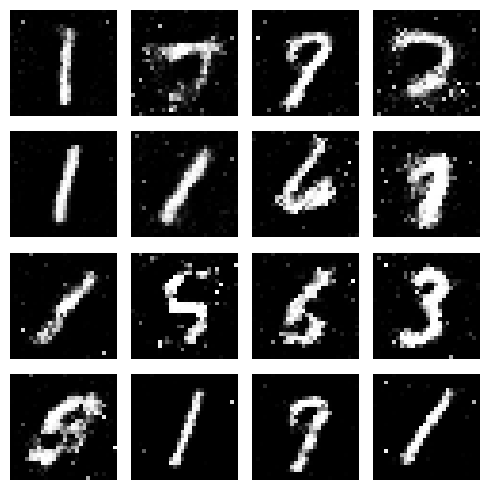

Epoch 140/150


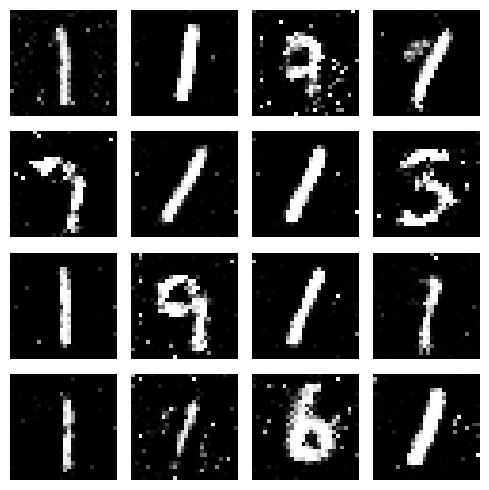

Epoch 141/150


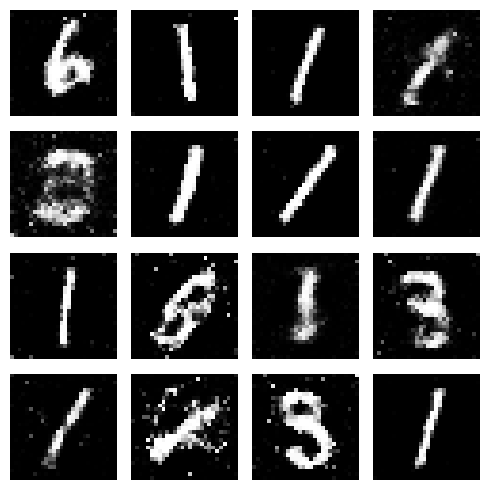

Epoch 142/150


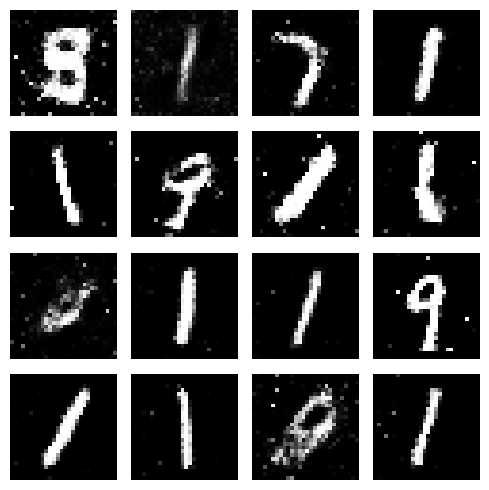

Epoch 143/150


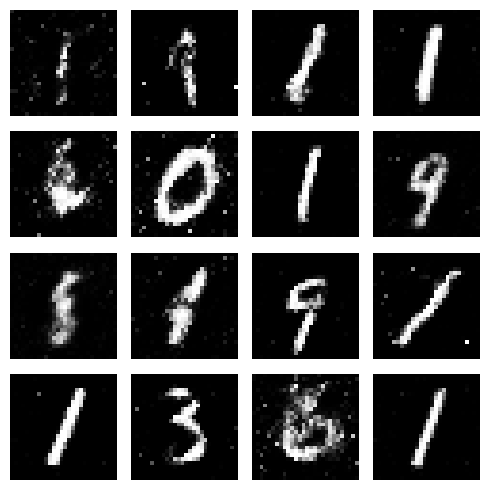

Epoch 144/150


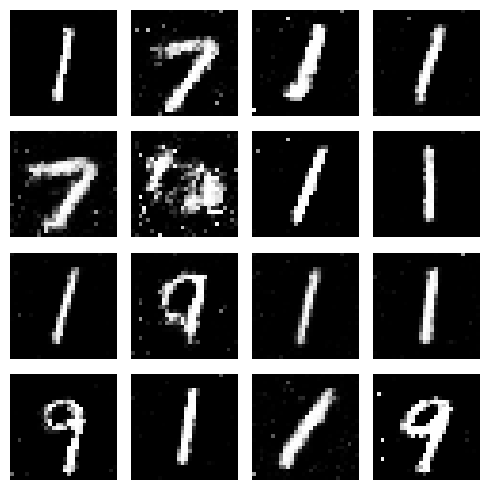

Epoch 145/150


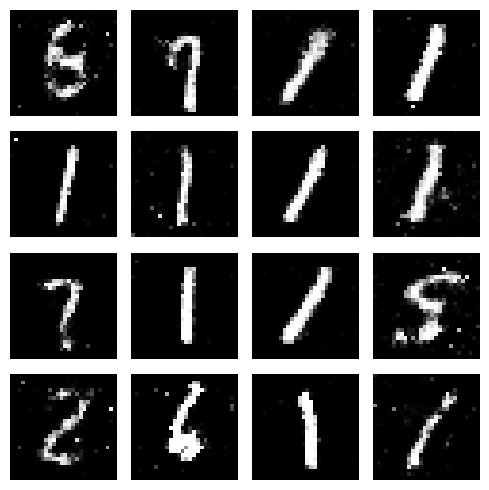

Epoch 146/150


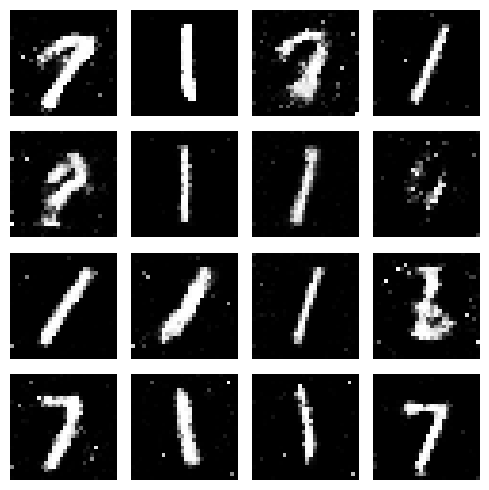

Epoch 147/150


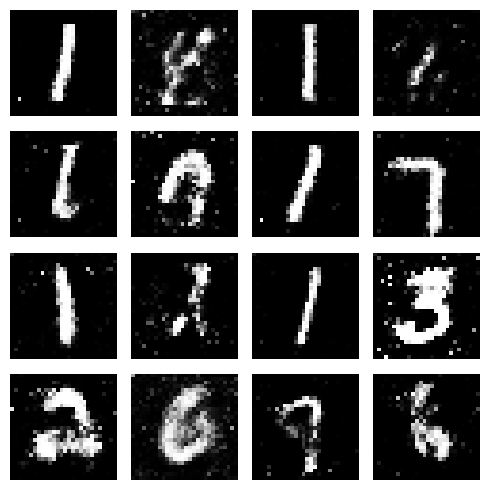

Epoch 148/150


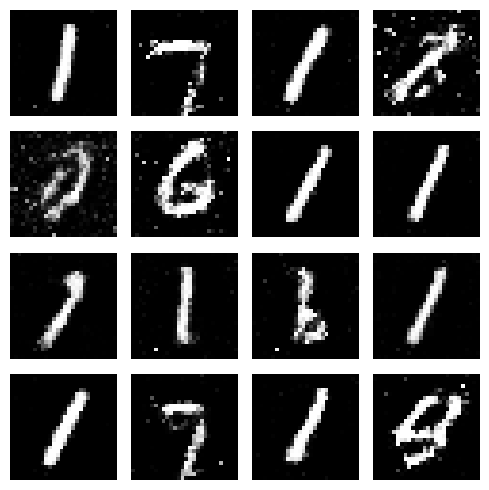

Epoch 149/150


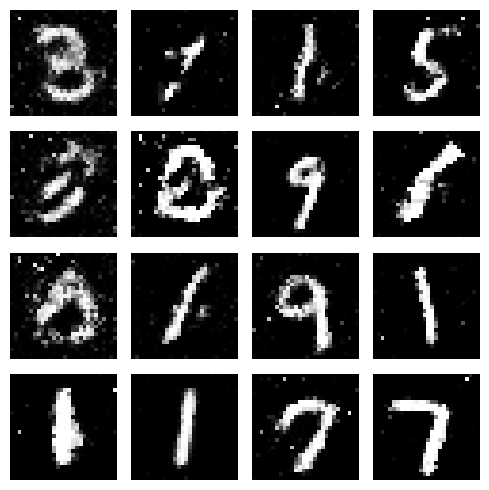

Epoch 150/150


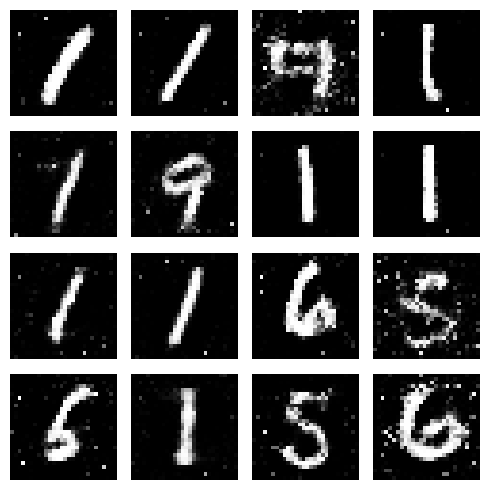

In [ ]:
generator = build_generator()
discriminator = build_discriminator()

gan = GAN(generator, discriminator)
gan.compile(generator_optimizer, discriminator_optimizer, cross_entropy)

train_gan(gan, dataset, epochs=150, noise_dim=100)

In [ ]:
# Generate images after the last epoch
noise_dim = 100
noise = tf.random.normal([8, noise_dim])  # Generate noise for 8 images
generated_images = gan.generator(noise)


In [ ]:
# Load some original images for comparison
num_samples = 8
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
original_images = train_images[:num_samples]
original_images = (original_images - 127.5) / 127.5  # Normalize to [-1, 1]


In [ ]:
def plot_original_images(original_images, examples=8, dim=(2, 4), figsize=(10, 5)):
    plt.figure(figsize=figsize)

    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_generated_images(generated_images, examples=8, dim=(2, 4), figsize=(10, 5)):
    plt.figure(figsize=figsize)

    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i].numpy().reshape(28, 28), cmap='gray')
        plt.title("Generated")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


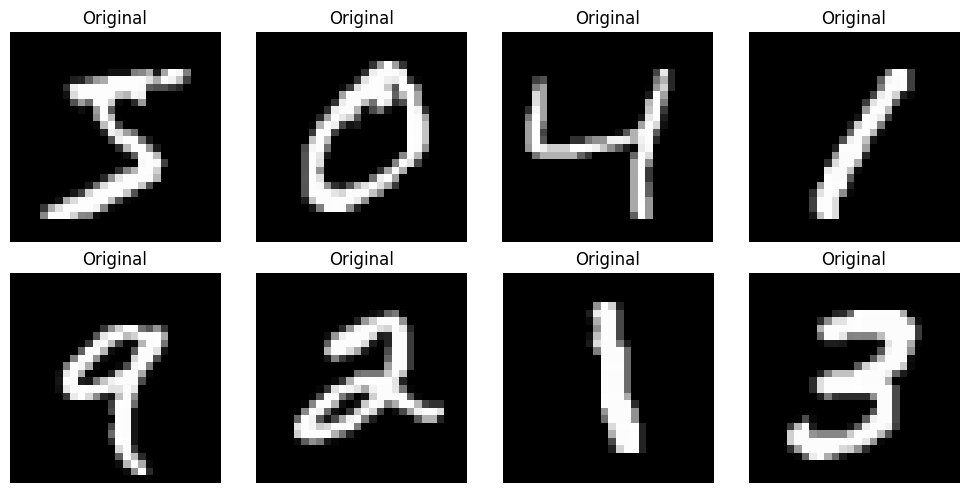

In [ ]:
plot_original_images(original_images, examples=8)

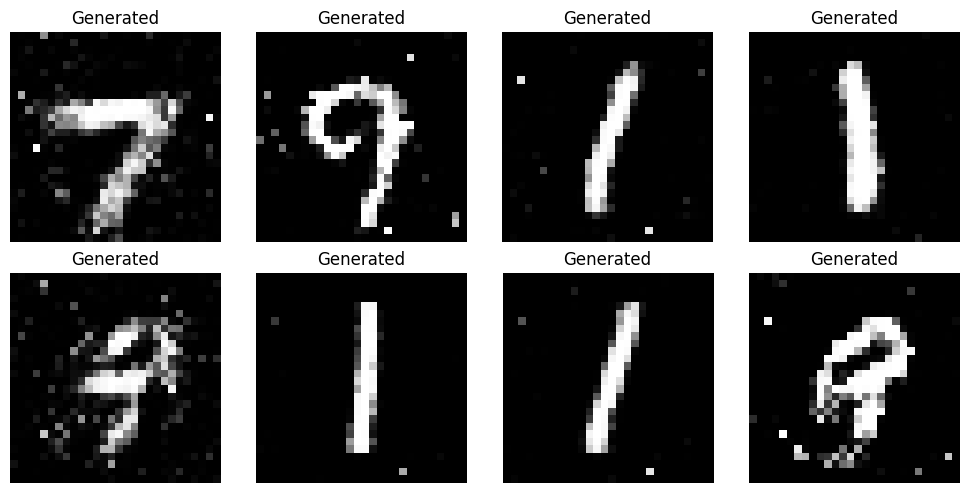

In [ ]:
plot_generated_images(generated_images, examples=8)